# **DATA AND INFORMATION QUALITY ASSIGNEMENT**

Data preparation pipeline is structured as:

1.   Data Profiling
2.   Data Quality Assessment
3.   Error detection and correction
4.   Data Duplication



# Preliminary steps - Data Loading

Load the data

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/DIQ_project/Comune-di-Milano-Pubblici-esercizi-fuori-piano.csv'
data = pd.read_csv(file_path, encoding='utf-16', delimiter = ';')

Mounted at /content/drive


Import libraries

In [ ]:
!pip install sweetviz lux-api autoviz plotly matplotlib mlxtend
!pip install python-Levenshtein pyphonetics jaro-winkler recordlinkage
import pandas as pd
import numpy as np
import json
import seaborn as sns

import sweetviz as sv
from autoviz import AutoViz_Class
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN

import recordlinkage

import json

import plotly.offline as pyo
sns.set_theme(style="whitegrid")
%matplotlib inline
!pip install ydata-profiling
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 8.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 55.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.0 MB/s eta 0:00:00
  Created wheel for lux-api: fil

## **1. DATA PROFILING**

**DATA PROFILING**

Data profiling is the set of activities and processes designed to determine the metadata of a given dataset.

Data profiling helps understand and prepare data for subsequent cleaning, integration, and analysis.

### Basic profiling activities:

We would like to know our dataset through some prelimirary information, such as how our data look like

In [ ]:
# Let's display the first 10 elements to look at our data
data.head(10)

,Settore storico pe,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Forma commercio,Forma commercio prev,Forma vendita,Superficie somministrazione
0,NaN,NaN,NaN,PZA,OSPEDALE MAGGIORE,3,1523.0,9.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,VLE,ALEMAGNA EMILIO,6,7106.0,1.0,NaN,NaN,NaN,NaN
2,NaN,NaN,codvia 9305 mm3 maciac; (z.d. 9),VIA,SERIO,15,4130.0,5.0,NaN,NaN,NaN,110.0
3,NaN,NaN,CSO BUENOS AIRES N. 36 (z.d. 3),CSO,BUENOS AIRES,36,2129.0,3.0,NaN,NaN,NaN,NaN
4,NaN,NaN,CSO MATTEOTTI GIACOMO N. 7 (z.d. 1),CSO,MATTEOTTI GIACOMO,7,218.0,1.0,NaN,NaN,NaN,NaN
5,NaN,NaN,LGO DOMODOSSOLA N. 1 (z.d. 8),LGO,DOMODOSSOLA,1,6140.0,8.0,NaN,NaN,NaN,68.0
6,NaN,NaN,LGO DOMODOSSOLA N. 1 (z.d. 8),LGO,DOMODOSSOLA,1,6140.0,8.0,NaN,NaN,NaN,NaN
7,NaN,NaN,--mahler--,VLE,LIGURIA,21,5264.0,6.0,NaN,NaN,NaN,NaN
8,NaN,NaN,PLE LOTTO LORENZO N. 15 c/o lido di milano; (z.d. 7),PLE,LOTTO LORENZO,15,6539.0,8.0,NaN,NaN,NaN,NaN
9,NaN,NaN,PLE LOTTO LORENZO N. 15 interno centro balneare; (z.d. 7),PLE,LOTTO LORENZO,15,6539.0,8.0,NaN,NaN,NaN,NaN


In [ ]:
# Look at data with the functions we have already seen in DQ ASSESSMENT
data.shape

(2070, 12)

In [ ]:
# data types
data.dtypes

,0
Settore storico pe,object
Insegna,object
Ubicazione,object
Tipo via,object
Via,object
Civico,object
Codice via,float64
ZD,float64
Forma commercio,object
Forma commercio prev,object


Civico is consider an object, but we know that in Italy it's numeric. Maybe there are some instances with a separator such as '/'.

In [ ]:
# Let's use .info() function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Settore storico pe           1877 non-null   object 
 1   Insegna                      593 non-null    object 
 2   Ubicazione                   2068 non-null   object 
 3   Tipo via                     2068 non-null   object 
 4   Via                          2069 non-null   object 
 5   Civico                       1916 non-null   object 
 6   Codice via                   2068 non-null   float64
 7   ZD                           2068 non-null   float64
 8   Forma commercio              1049 non-null   object 
 9   Forma commercio prev         1045 non-null   object 
 10  Forma vendita                1040 non-null   object 
 11  Superficie somministrazione  1701 non-null   float64
dtypes: float64(3), object(9)
memory usage: 194.2+ KB


### Trivial Single Column Analysis

In [ ]:
# we want to create a new dataframe, that for each column, stores some metadata.
metrics = {}


for col in data.columns:

    #  Actual values, i.e., non-null/non-missing values
    actual = data[col].notnull().sum()

    # null values
    null_values = data[col].isnull().sum()

    # percentage of null values
    null_percentage = (null_values / len(data)) * 100

    metrics[col] = {
        "Actual": actual,
        "Null Values": null_values,
        "Null Percentage (%)": null_percentage
    }


metrics_df = pd.DataFrame(metrics).T
metrics_df

,Actual,Null Values,Null Percentage (%)
Settore storico pe,1877.0,193.0,9.323671
Insegna,593.0,1477.0,71.352657
Ubicazione,2068.0,2.0,0.096618
Tipo via,2068.0,2.0,0.096618
Via,2069.0,1.0,0.048309
Civico,1916.0,154.0,7.439614
Codice via,2068.0,2.0,0.096618
ZD,2068.0,2.0,0.096618
Forma commercio,1049.0,1021.0,49.323671
Forma commercio prev,1045.0,1025.0,49.516908


### **Histograms**

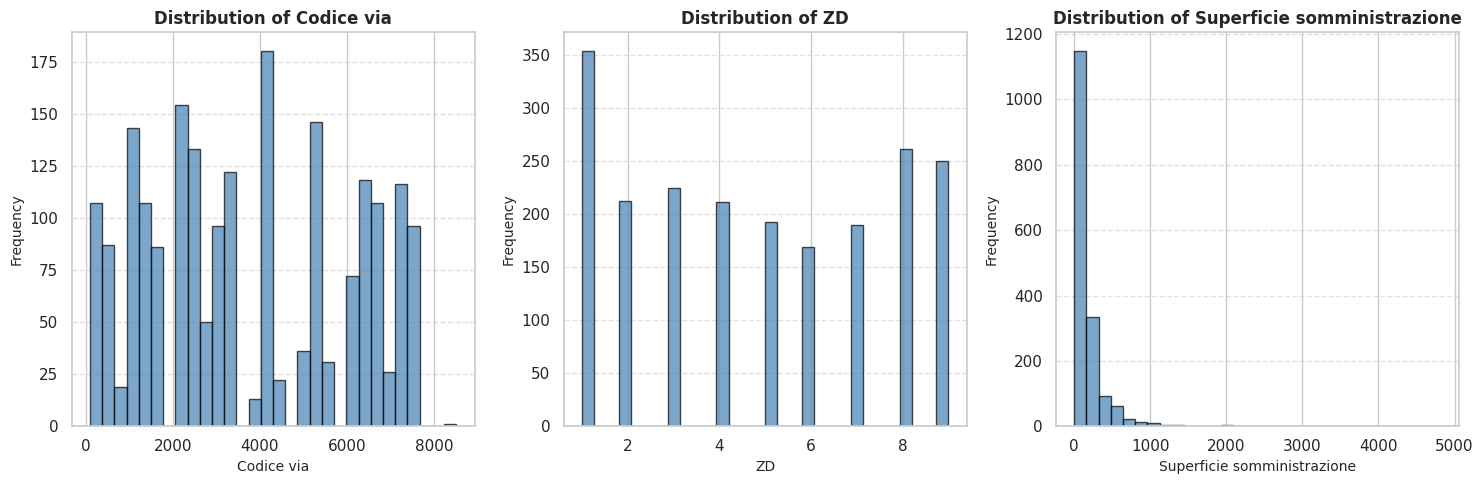

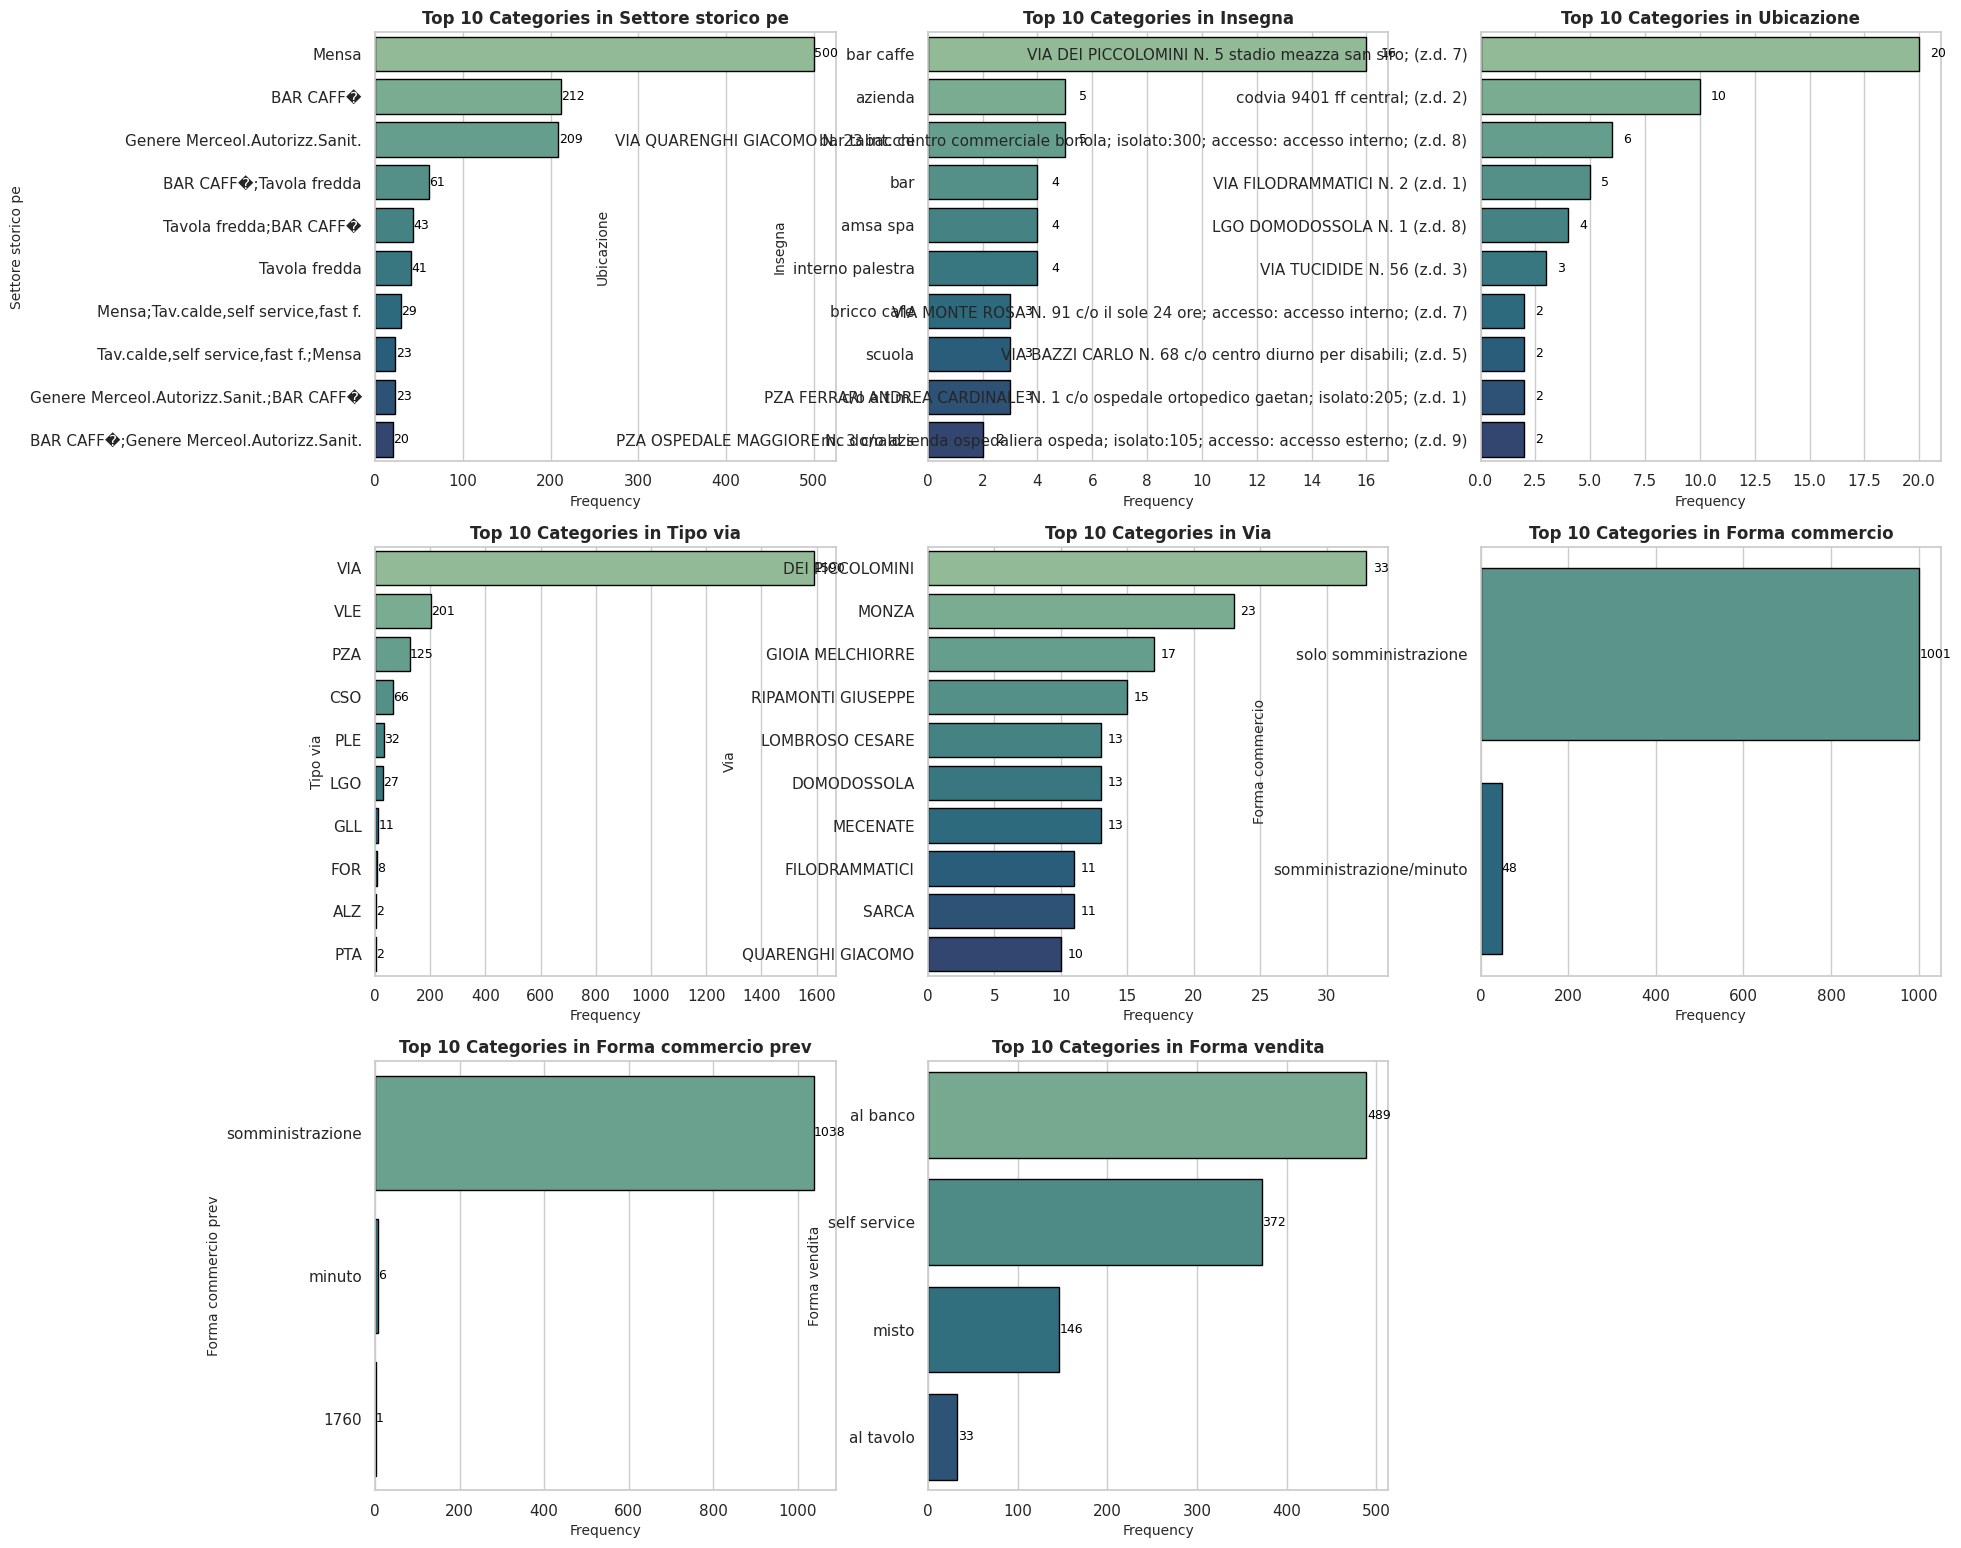

In [ ]:
# Numeric Columns
numeric_cols = ['Codice via', 'ZD', 'Superficie somministrazione']
# Categorical Columns
categorical_cols = ['Settore storico pe', 'Insegna', 'Ubicazione', 'Tipo via', 'Via', 'Forma commercio', 'Forma commercio prev', 'Forma vendita']

# Plot histograms for numeric columns using subplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    data[col].dropna().hist(bins=30, color='steelblue', edgecolor='black', alpha=0.7, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
fig.tight_layout()
plt.show()

# Plot barplots for categorical columns using subplots
n_cols = 3
n_rows = -(-len(categorical_cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = data[col].value_counts().head(10)
    sns.barplot(x=value_counts.values, y=value_counts.index, palette='crest', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Top 10 Categories in {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Frequency', fontsize=10)
    axes[i].set_ylabel(col, fontsize=10)
    # Add count annotations above bars
    for j, v in enumerate(value_counts.values):
        axes[i].text(v + 0.5, j, str(v), color='black', va='center', fontsize=9)

for j in range(len(categorical_cols), len(axes)):
    axes[j].axis('off')

fig.tight_layout()
plt.show()

### **Correlations**

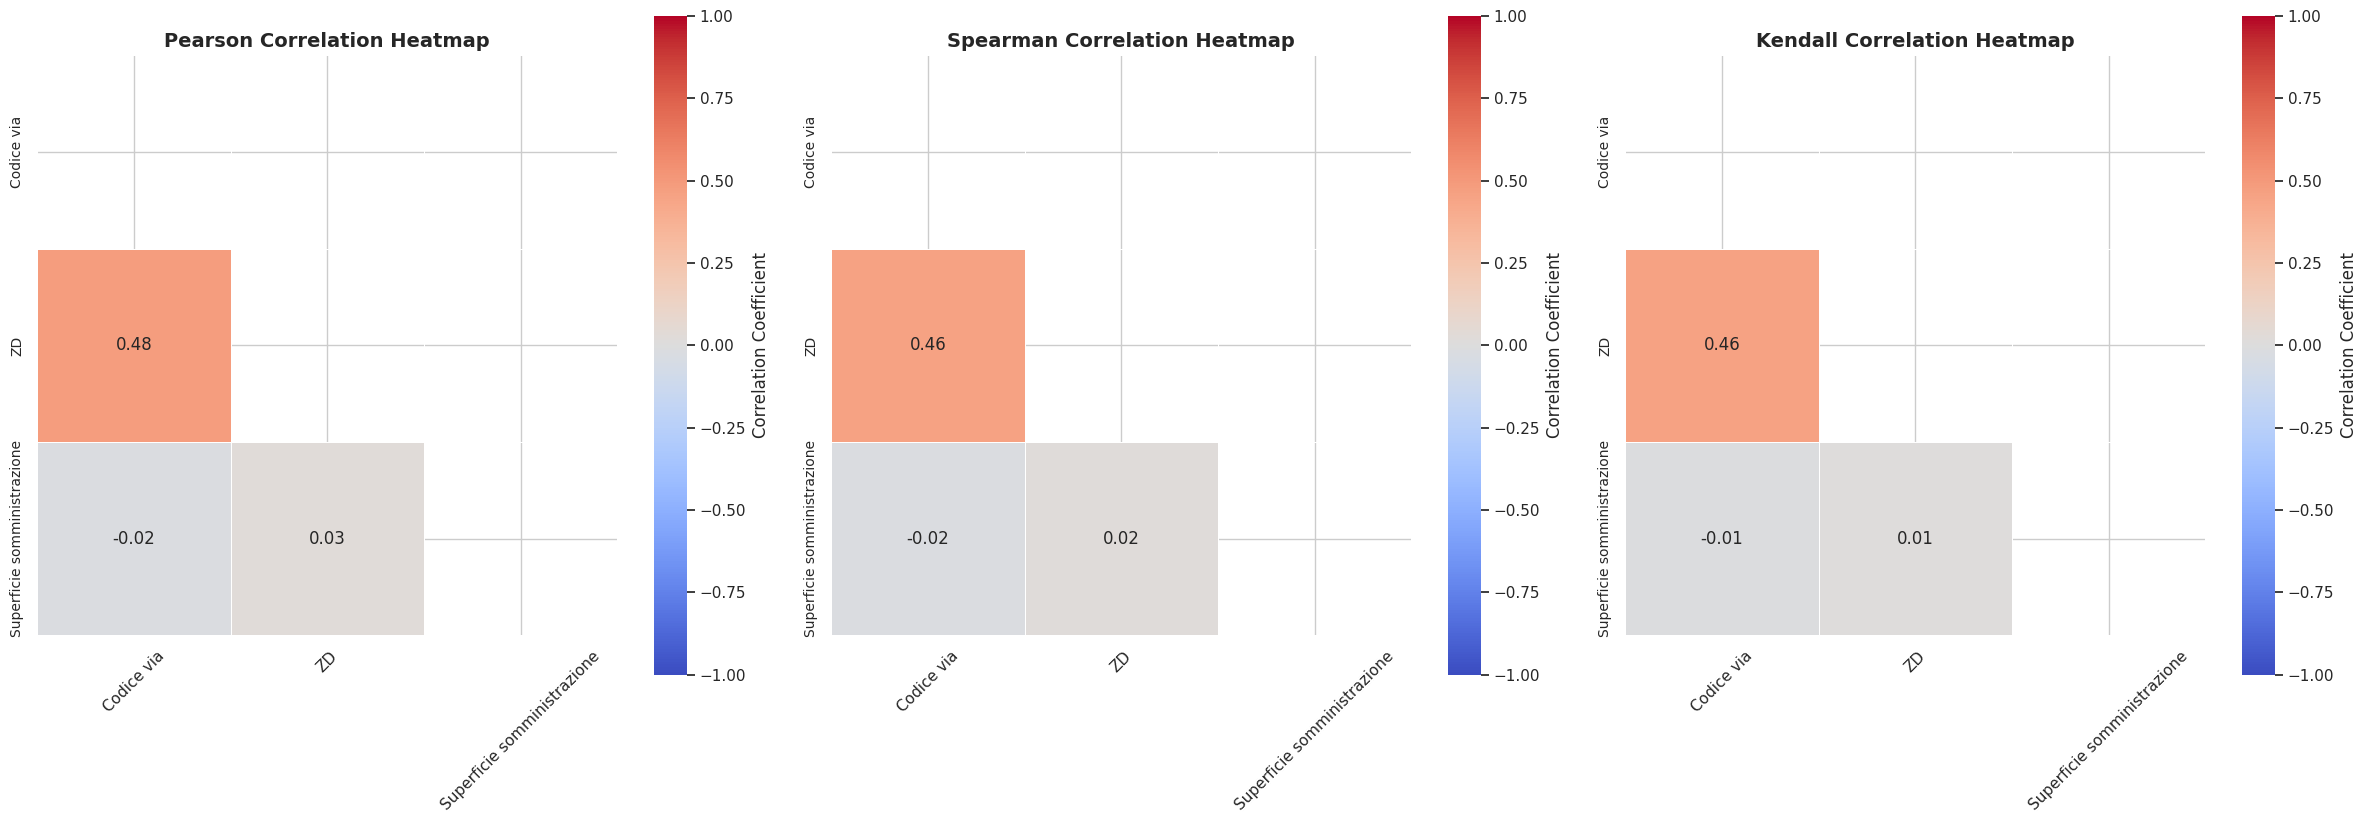

In [ ]:
# We can also look at the correlation among numeric attributes.
# To be more reliable we can use different correlation product, such as pearson's, spearman's and kendall's coefficient

def plot_corr_subplot(ax, corr, method_name):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
                cbar_kws={'label': 'Correlation Coefficient'},
                vmin=-1, vmax=1, linewidths=0.5, square=True, ax=ax)
    ax.set_title(f'{method_name} Correlation Heatmap', fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='y', labelsize=10)

corr_pearson = data.select_dtypes(include=['float64', 'int8']).corr(method='pearson') # Pearson's correlation product
corr_spearman = data.select_dtypes(include=['float64', 'int8']).corr(method='spearman') # Spearman's correlation product
corr_kendall = data.select_dtypes(include=['float64', 'int8']).corr(method='kendall') # Kendall's correlation product

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
plot_corr_subplot(axes[0], corr_pearson, 'Pearson')
plot_corr_subplot(axes[1], corr_spearman, 'Spearman')
plot_corr_subplot(axes[2], corr_kendall, 'Kendall')

plt.tight_layout()
plt.show()

Our numeric dimensions seem to be not correlated: we have two attributes (Codice Via and ZD) that are almost decorrelated with Superficie somministrazione, whereas Codice Via - ZD have a correlation but it's not so strong. In fact, we can assume that given an address it is possible to obtain its corresponding zone

### **SWEETVIZ LIBRARY**

                                             |          | [  0%]   00:00 -> (? left)


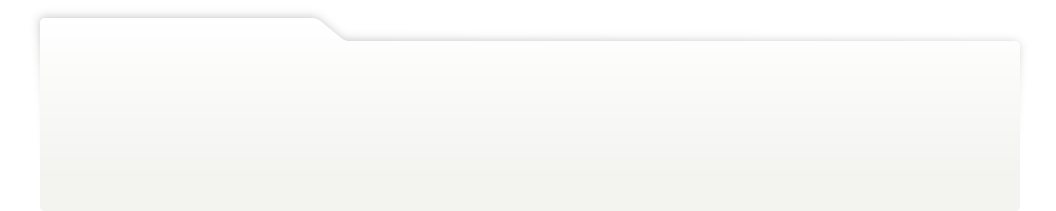
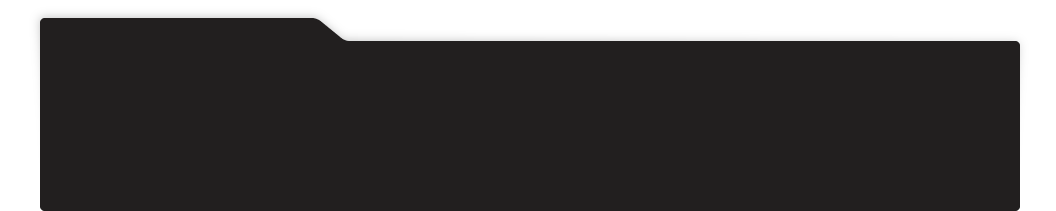
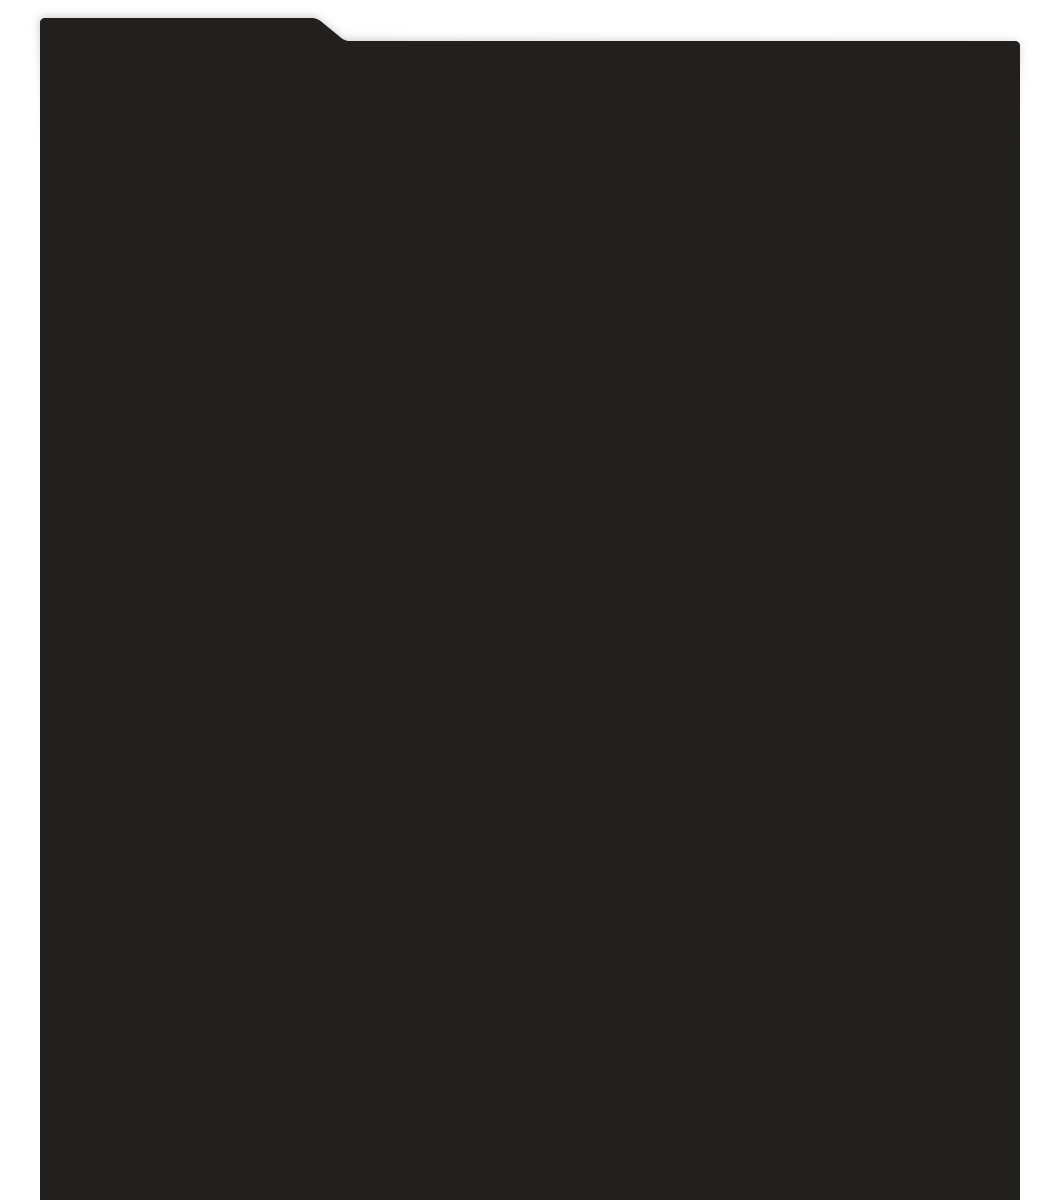
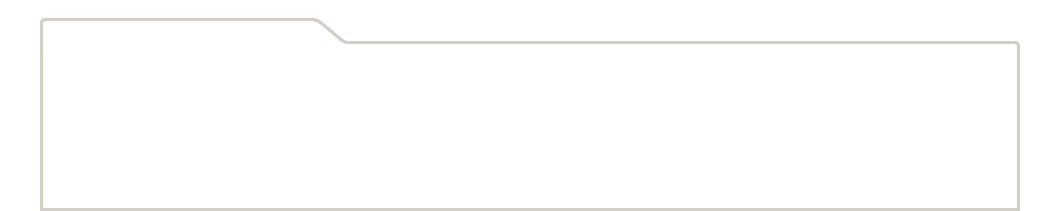
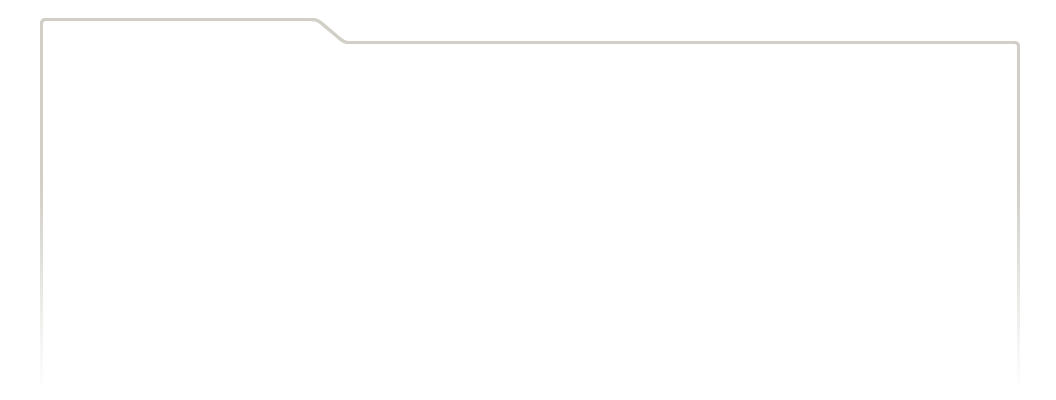
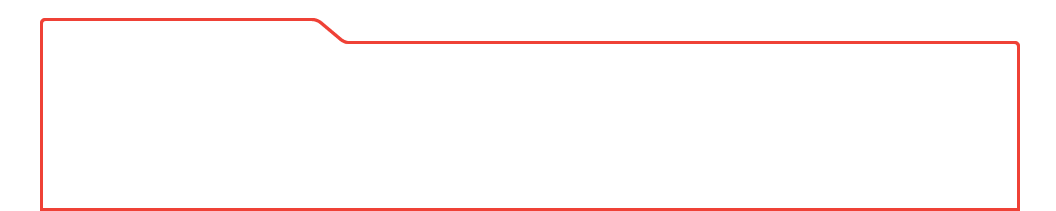
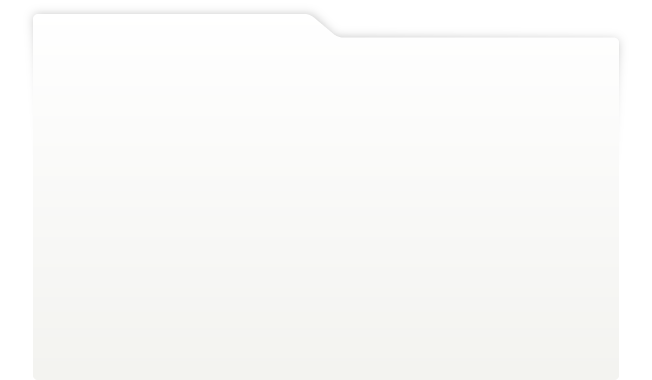
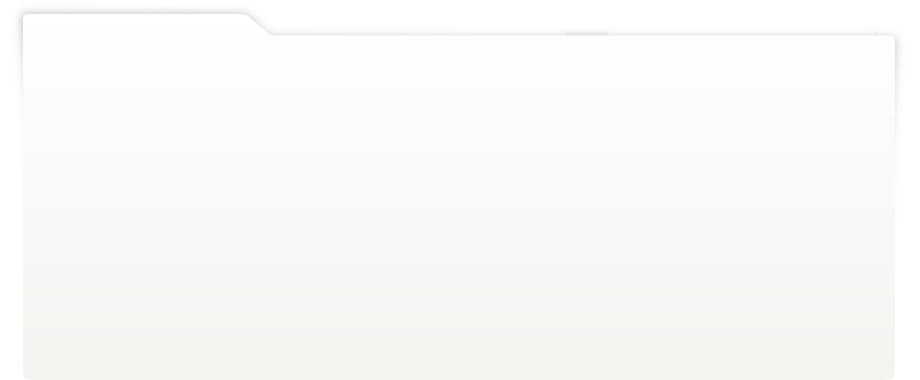
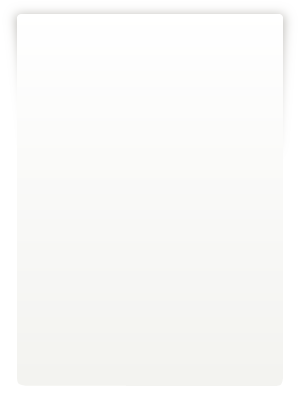
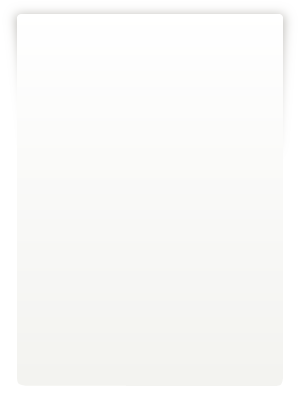
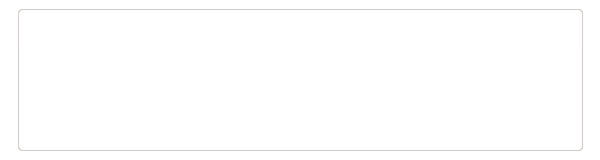
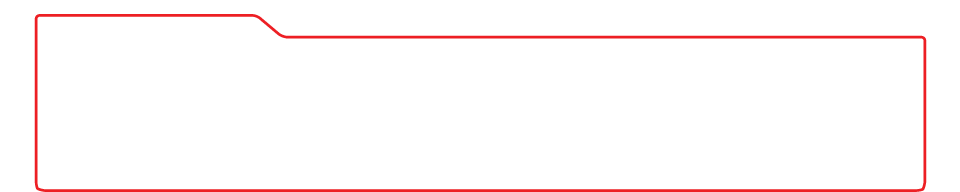
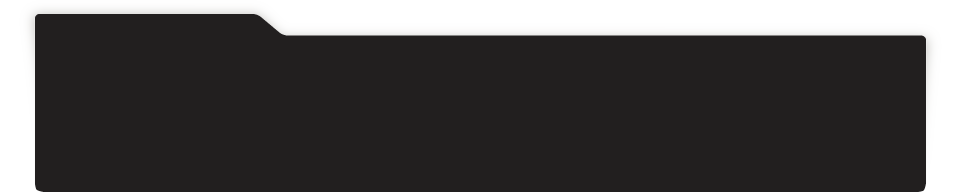
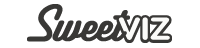
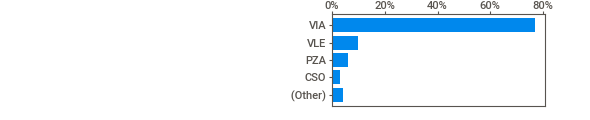
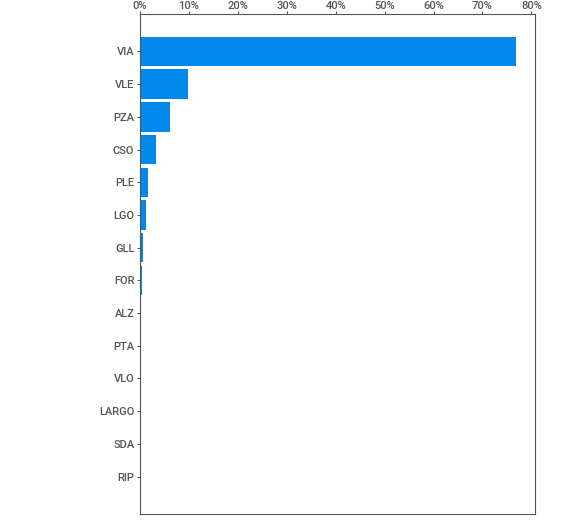
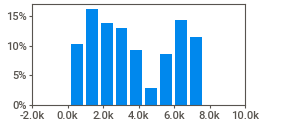
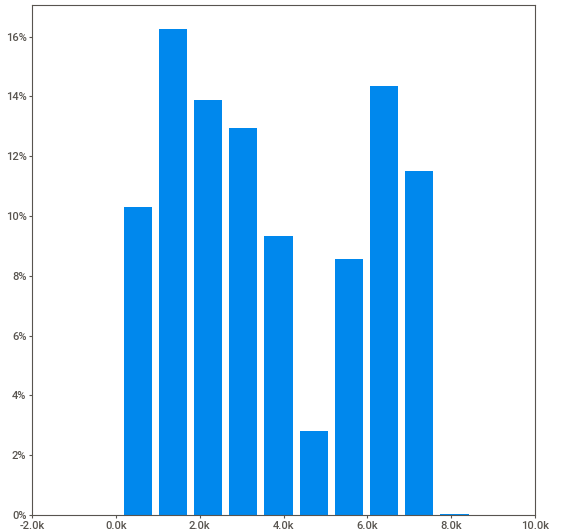
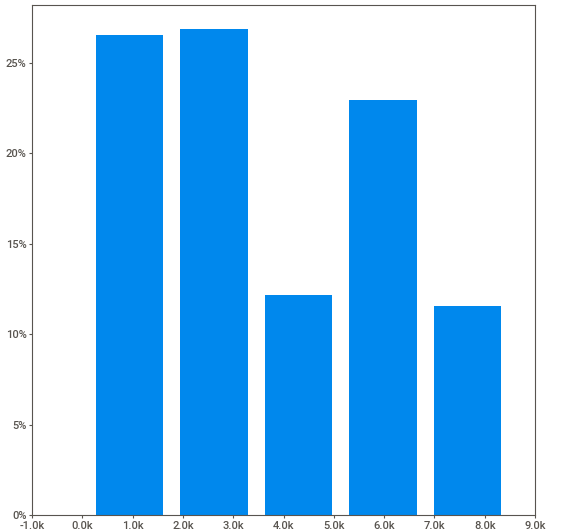
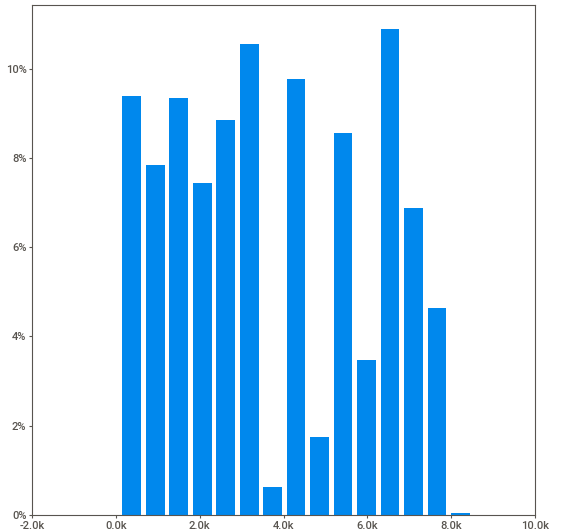
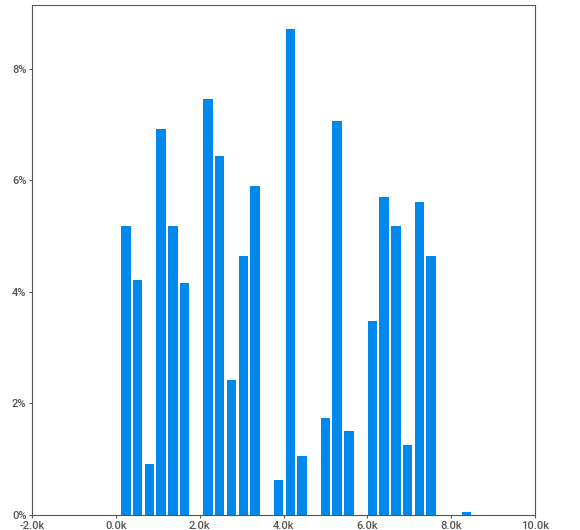
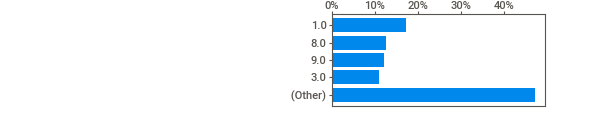
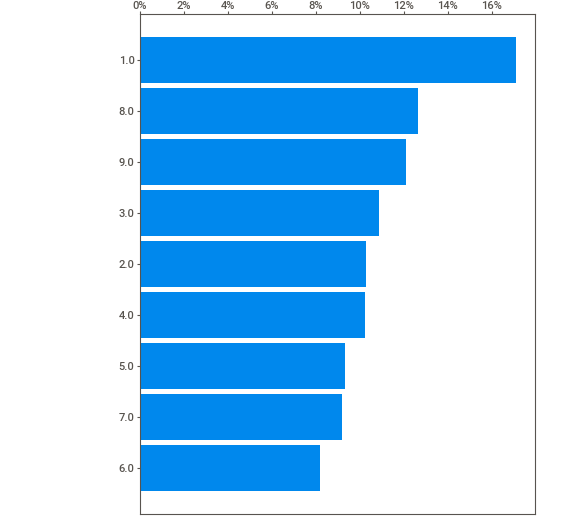
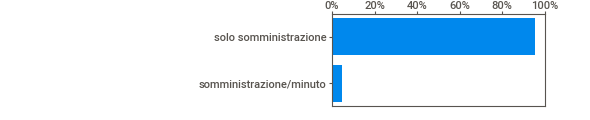
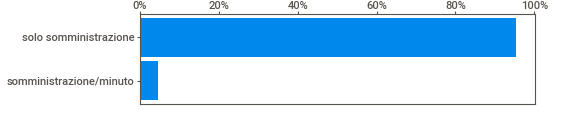
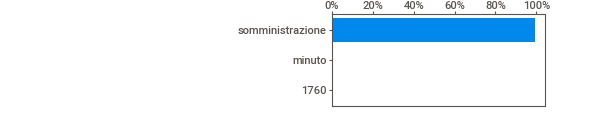
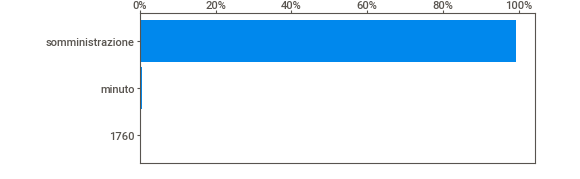
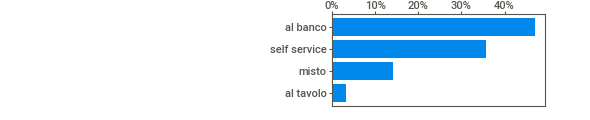
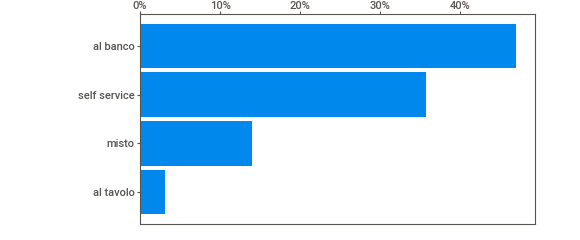
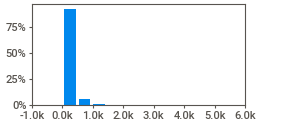
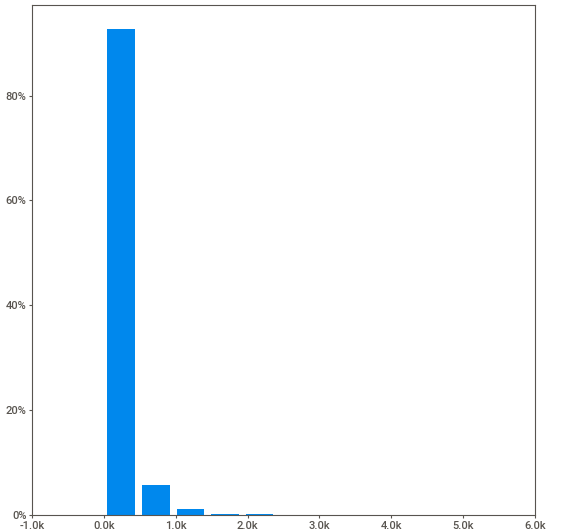
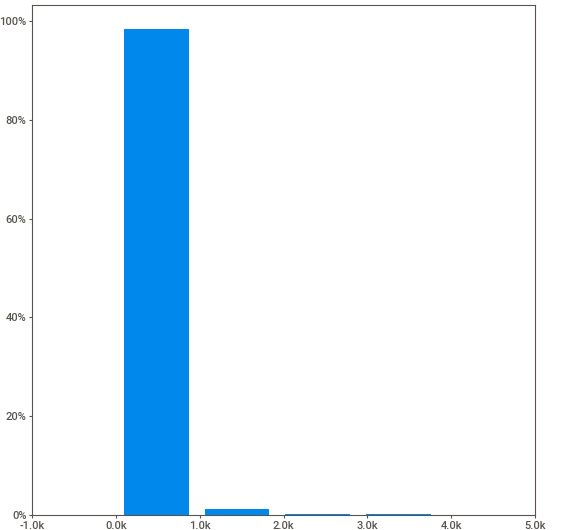
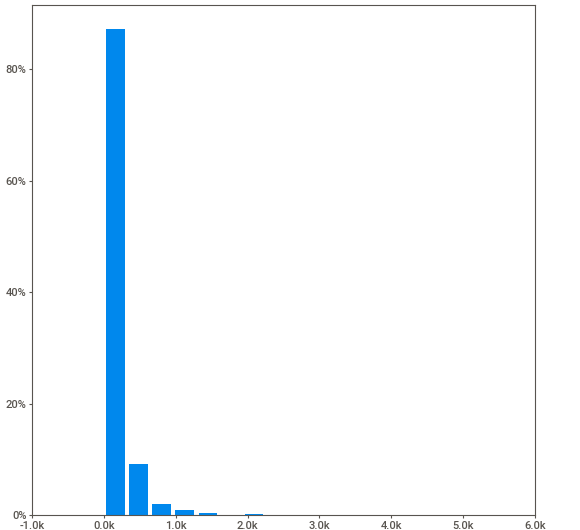
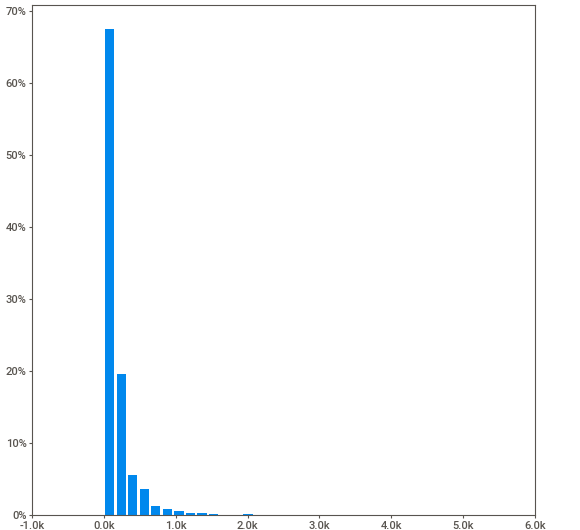
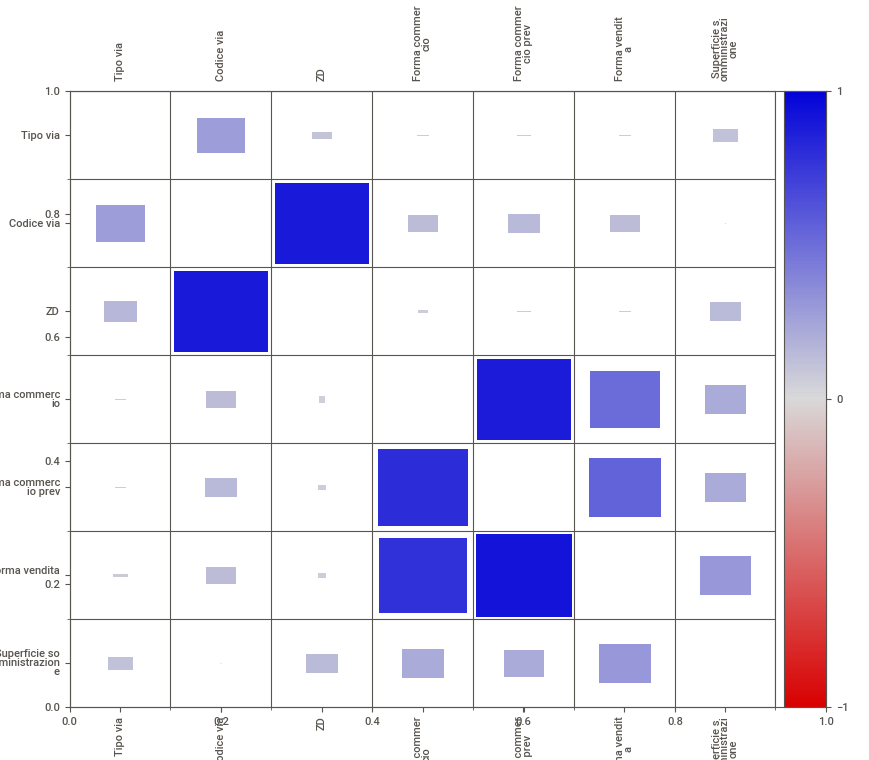
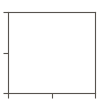

In [ ]:
sweet_report = sv.analyze([data,'Sweetviz Report'])
sweet_report.show_notebook()

# **2. Data Quality Assessment**

Now that we know our data, we can start to compute some DQ dimensions. Let's start

### **Single Column Analysis**

We want for each column to compute these kind of dimensions

UNIQUENESS, DISTINCTNESS,  DUPLICATION (on unique values), COMPLETENESS

In [ ]:
DQD_ASSESSMENT = pd.DataFrame(columns=['Attribute', "UNIQUENESS (%)", "DISTINCTNESS (%)", "DUPLICATION (%)", "COMPLETENESS"])

In [ ]:
print("Computing the DQ dimensions for each columns")
for col in data.columns:

    CARDINALITY = (data[col].nunique())
    COUNT = data[col].count()
    ROWS = len(data[col])
    UNIQUENESS = CARDINALITY / data.shape[0]

    DISTINCTNESS = CARDINALITY / COUNT

    DUPLICATION = (data[col].duplicated().sum()/data.shape[0])

    NOT_NULL = data[col].count().sum()
    NULL = data[col].isnull().sum().sum()
    TOT = data.shape[0]
    COMPLETENESS = NOT_NULL / TOT

    DQD_ASSESSMENT.loc[len(DQD_ASSESSMENT.index)] = [col, UNIQUENESS * 100, DISTINCTNESS * 100, DUPLICATION * 100, COMPLETENESS]

print("DONE!!")

Computing the DQ dimensions for each columns
DONE!!


In [ ]:
DQD_ASSESSMENT

,Attribute,UNIQUENESS (%),DISTINCTNESS (%),DUPLICATION (%),COMPLETENESS
0,Settore storico pe,22.898551,25.253063,77.053140,0.906763
1,Insegna,25.990338,90.725126,73.961353,0.286473
2,Ubicazione,96.570048,96.663443,3.381643,0.999034
3,Tipo via,0.676329,0.676983,99.275362,0.999034
4,Via,49.227053,49.250846,50.724638,0.999517
5,Civico,8.212560,8.872651,91.739130,0.925604
6,Codice via,49.371981,49.419729,50.579710,0.999034
7,ZD,0.434783,0.435203,99.516908,0.999034
8,Forma commercio,0.096618,0.190658,99.855072,0.506763
9,Forma commercio prev,0.144928,0.287081,99.806763,0.504831


### Global assessment

In [ ]:
# Global DQ dimensions
DQD_GLOBAL_ASSESSMENT = pd.DataFrame(columns=["SPATIAL_EXTENT", "UNIQUENESS (%)", "DUPLICATION (%)", "DISTINCTNESS (%)", "COMPLETENESS(%)"])

In [ ]:
SPATIAL_EXTENT = data.nunique().sum()

CARDINALITY = (data.nunique().sum())
COUNT = data.count().sum()
ROWS = data.shape[0]*data.shape[1]
UNIQUENESS = CARDINALITY / ROWS

DUPLICATION = data.duplicated()
DUPLICATION = (DUPLICATION.sum() / data.shape[0]) * 100

DISTINCTNESS = (CARDINALITY / COUNT) * 100

NOT_NULL = data.count().sum()
NULL = data.isnull().sum().sum()
TOT = data.shape[0]*data.shape[1]
COMPLETENESS = (NOT_NULL / TOT) * 100

DQD_GLOBAL_ASSESSMENT.loc[len(DQD_GLOBAL_ASSESSMENT)] = [SPATIAL_EXTENT, UNIQUENESS * 100, DUPLICATION, DISTINCTNESS, COMPLETENESS]
DQD_GLOBAL_ASSESSMENT

,SPATIAL_EXTENT,UNIQUENESS (%),DUPLICATION (%),DISTINCTNESS (%),COMPLETENESS(%)
0,5709.0,22.983092,1.062802,29.184133,78.752013


### **Consistency**

**Consistency** is the satisfaction of semantic rules defined over a set of data items. We can assess this dimension via

    Number of consistent tuples / Total number of tuples

We can procede by looking at the numeric variables

In [ ]:

ZD_PROPERTY = data['ZD'].dropna()
ZD_BINARY = np.where(ZD_PROPERTY > 0, 1, 0)

CONSISTENT = ZD_BINARY.sum()
CONSISTENCY = CONSISTENT / len(ZD_PROPERTY)

print(f"Consistency: {round(CONSISTENCY * 100, 2)} %")


Consistency: 100.0 %


In [ ]:
COD_VIA_PROPERTY = data['Codice via'].dropna()
COD_VIA_PROPERTY['COD_VIA_PROPERTY'] = np.where(COD_VIA_PROPERTY > 0, 1, 0)
CONSISTENT = COD_VIA_PROPERTY['COD_VIA_PROPERTY'].sum()
CONSISTENCY = CONSISTENT / len(data['Codice via'])
print(f"Consistency: {round(CONSISTENCY, 2) * 100} %")

Consistency: 100.0 %


In [ ]:
SUP_SOMM = data['Superficie somministrazione'].dropna()
SUP_SOMM['SUP_SOMM'] = np.where(SUP_SOMM > 0, 1, 0)
CONSISTENT = SUP_SOMM['SUP_SOMM'].sum()
CONSISTENCY = CONSISTENT / len(data['Superficie somministrazione'].dropna())
print(f"Consistency: {round(CONSISTENCY, 2) * 100} %")

Consistency: 100.0 %


All the non NaN values of ZD, Codice Via and Superficie somministrazione respect the consistency property

### **Association rules**

An association rule is an implication of the form X → Y, where X and Y are itemsets.
We may use this for imputation later on. Let's compute these rules with FPGrowth

In [ ]:
#Put all items of each transactions into a list
records = []
for i in range (0, len(data)):
    records.append([str(data.values[i,j]) for j in range(0, data.shape[1])])

In [ ]:
#Initializing the transactionEncoder
TE = TransactionEncoder()
array = TE.fit(records).transform(records)

In [ ]:
#Building the data frame rows are logical and columns are the items have been purchased
df = pd.DataFrame(array, columns=TE.columns_)

In [ ]:
#Drop NaN
df_clean = df.drop(['nan'], axis = 1)

In [ ]:
#Running the fpgrowth algorithm
result = fpgrowth(df_clean, min_support=0.125, use_colnames=True)
result.sort_values(by=['support'], ascending=False)

,support,itemsets
1,0.768599,(VIA)
3,0.501449,(somministrazione)
4,0.483575,(solo somministrazione)
9,0.476812,"(solo somministrazione, somministrazione)"
8,0.373913,"(somministrazione, VIA)"
10,0.360870,"(solo somministrazione, VIA)"
11,0.356522,"(solo somministrazione, somministrazione, VIA)"
7,0.241546,(Mensa)
5,0.236232,(al banco)
12,0.233333,"(somministrazione, al banco)"


In [ ]:
#Extract association rules with min confidence 0.90
result = association_rules(result, num_itemsets=len(df_clean), metric='confidence', min_threshold=0.90)
result.sort_values(by=['confidence'], ascending=False).reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,21,"(solo somministrazione, self service, VIA)",(somministrazione),0.136232,0.501449,0.136232,1.000000,1.994220,1.0,0.067919,inf,0.577181,0.271676,1.000000,0.635838
1,6,"(solo somministrazione, al banco)",(somministrazione),0.216908,0.501449,0.216908,1.000000,1.994220,1.0,0.108140,inf,0.636644,0.432563,1.000000,0.716281
2,16,"(solo somministrazione, self service)",(somministrazione),0.176812,0.501449,0.176812,1.000000,1.994220,1.0,0.088150,inf,0.605634,0.352601,1.000000,0.676301
3,11,"(solo somministrazione, al banco, VIA)",(somministrazione),0.157005,0.501449,0.157005,1.000000,1.994220,1.0,0.078275,inf,0.591404,0.313102,1.000000,0.656551
4,22,"(self service, somministrazione, VIA)",(solo somministrazione),0.136715,0.483575,0.136232,0.996466,2.060625,1.0,0.070120,146.148309,0.596223,0.281437,0.993158,0.639092
5,19,"(self service, VIA)",(somministrazione),0.137681,0.501449,0.136715,0.992982,1.980225,1.0,0.067675,71.043478,0.574042,0.272115,0.985924,0.632811
6,14,(self service),(somministrazione),0.179710,0.501449,0.178261,0.991935,1.978137,1.0,0.088145,61.820290,0.602804,0.354467,0.983824,0.673713
7,17,"(self service, somministrazione)",(solo somministrazione),0.178261,0.483575,0.176812,0.991870,2.051120,1.0,0.090609,63.520290,0.623630,0.364542,0.984257,0.678752
8,23,"(self service, VIA)","(solo somministrazione, somministrazione)",0.137681,0.476812,0.136232,0.989474,2.075188,1.0,0.070584,49.702899,0.600840,0.284848,0.979880,0.637594
9,20,"(self service, VIA)",(solo somministrazione),0.137681,0.483575,0.136232,0.989474,2.046164,1.0,0.069653,49.060386,0.592914,0.280876,0.979617,0.635596


We can say that if we have some kind of combinations in our attributes (such as "via" and "self-service") we have also "somministrazione".

# **3. Data Transformation**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2070 entries, 0 to 2069
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Settore storico pe           1877 non-null   object 
 1   Insegna                      593 non-null    object 
 2   Ubicazione                   2068 non-null   object 
 3   Tipo via                     2068 non-null   object 
 4   Via                          2069 non-null   object 
 5   Civico                       1916 non-null   object 
 6   Codice via                   2068 non-null   float64
 7   ZD                           2068 non-null   float64
 8   Forma commercio              1049 non-null   object 
 9   Forma commercio prev         1045 non-null   object 
 10  Forma vendita                1040 non-null   object 
 11  Superficie somministrazione  1701 non-null   float64
dtypes: float64(3), object(9)
memory usage: 194.2+ KB


**1. Column Renaming**

We want columns' name more readable and with a "snake_case"

In [ ]:
# change the name of Column "Settore Storico PE" to "settore_storico"
data.rename(columns={'Settore storico pe': 'settore_storico'}, inplace=True)

# change the name of Column "Insegna" to "insegna"
data.rename(columns={'Insegna': 'insegna'}, inplace=True)

# change the name of Column "Ubicazione" to "ubicazione"
data.rename(columns={'Ubicazione': 'ubicazione'}, inplace=True)

# change the name of Column "Tipo via" to "tipo_via"
data.rename(columns={'Tipo via': 'tipo_via'}, inplace=True)

# change the name of Column "Via" to "via"
data.rename(columns={'Via': 'via'}, inplace=True)

# change the name of Column "Civico" to "civico"
data.rename(columns={'Civico': 'civico'}, inplace=True)


# change the name of Column "Codice via" to "codice_via"
data.rename(columns={'Codice via': 'codice_via'}, inplace=True)


# change the name of Column "ZD" to "zona_di_decentramento"
data.rename(columns={'ZD': 'zona_di_decentramento'}, inplace=True)


# change the name of Column "Forma commercio" to "forma_commercio"
data.rename(columns={'Forma commercio': 'forma_commercio'}, inplace=True)


# change the name of Column "Forma commercio prev" to "forma_commercio_precedente"
data.rename(columns={'Forma commercio prev': 'forma_commercio_precedente'}, inplace=True)


# change the name of Column "Forma vendita" to "forma_vendita"
data.rename(columns={'Forma vendita': 'forma_vendita'}, inplace=True)


# change the name of Column "Superficie somministrazione" to "superficie_somministrazione"
data.rename(columns={'Superficie somministrazione': 'superficie_somministrazione'}, inplace=True)


**2. Standardization**

Standardize values in the columns "settore_storico" and "tipo_via"

In [ ]:
# standardize values in "settore_storico"; lowering characters and replacing unk value
data['settore_storico'] = data['settore_storico'].str.lower().str.replace('�', 'è', regex=False)

In [ ]:
# standardize all the different values in tipo_via

tipo_via_mapping = {
    'PZA': 'PIAZZA',
    'VLE': 'VIALE',
    'VIA': 'VIA',
    'CSO': 'CORSO',
    'LGO': 'LARGO',
    'PLE': 'PIAZZALE',
    'FOR': 'FORO',
    'GLL': 'GALLERIA',
    'VLO': 'VICOLO',
    'LARGO': 'LARGO',
    'ALZ': 'ALZAIA',
    'PTA': 'PORTA',
    'SDA': 'STRADA',
    'RIP': 'RIPA'
}


data['tipo_via'] = data['tipo_via'].replace(tipo_via_mapping)


**3. Splitting**

Since the "settore_storico" column contains multiple values separated by ";", we decided to split it into two columns, referring to the first one later as it provides more informative content.

In [ ]:
# split column "settore_storico"
data[['settore_storico1', 'settore_storico2']] = data['settore_storico'].str.split(';', n=1, expand=True)

**4. Merging**

Merge columns in order to provide a single column for the address.

In [ ]:
# merge columns "tipo_via" - "via"
indirizzo = data['tipo_via'].str.cat(data['via'], sep=' ', na_rep='')
data.insert(2, 'indirizzo', indirizzo)
data.head(10)

,settore_storico,insegna,indirizzo,ubicazione,tipo_via,via,civico,codice_via,zona_di_decentramento,forma_commercio,forma_commercio_precedente,forma_vendita,superficie_somministrazione,settore_storico1,settore_storico2
0,NaN,NaN,PIAZZA OSPEDALE MAGGIORE,NaN,PIAZZA,OSPEDALE MAGGIORE,3,1523.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,VIALE ALEMAGNA EMILIO,NaN,VIALE,ALEMAGNA EMILIO,6,7106.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,VIA SERIO,codvia 9305 mm3 maciac; (z.d. 9),VIA,SERIO,15,4130.0,5.0,NaN,NaN,NaN,110.0,NaN,NaN
3,NaN,NaN,CORSO BUENOS AIRES,CSO BUENOS AIRES N. 36 (z.d. 3),CORSO,BUENOS AIRES,36,2129.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,CORSO MATTEOTTI GIACOMO,CSO MATTEOTTI GIACOMO N. 7 (z.d. 1),CORSO,MATTEOTTI GIACOMO,7,218.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,LARGO DOMODOSSOLA,LGO DOMODOSSOLA N. 1 (z.d. 8),LARGO,DOMODOSSOLA,1,6140.0,8.0,NaN,NaN,NaN,68.0,NaN,NaN
6,NaN,NaN,LARGO DOMODOSSOLA,LGO DOMODOSSOLA N. 1 (z.d. 8),LARGO,DOMODOSSOLA,1,6140.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,VIALE LIGURIA,--mahler--,VIALE,LIGURIA,21,5264.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,PIAZZALE LOTTO LORENZO,PLE LOTTO LORENZO N. 15 c/o lido di milano; (z.d. 7),PIAZZALE,LOTTO LORENZO,15,6539.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,PIAZZALE LOTTO LORENZO,PLE LOTTO LORENZO N. 15 interno centro balneare; (z.d. 7),PIAZZALE,LOTTO LORENZO,15,6539.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


**5. Dropping**



In [ ]:
# drop column "ubicazione" contains only redundant informations
data = data.drop(columns=['ubicazione'])
data.head(10)

,settore_storico,insegna,indirizzo,tipo_via,via,civico,codice_via,zona_di_decentramento,forma_commercio,forma_commercio_precedente,forma_vendita,superficie_somministrazione,settore_storico1,settore_storico2
0,NaN,NaN,PIAZZA OSPEDALE MAGGIORE,PIAZZA,OSPEDALE MAGGIORE,3,1523.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,VIALE ALEMAGNA EMILIO,VIALE,ALEMAGNA EMILIO,6,7106.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,VIA SERIO,VIA,SERIO,15,4130.0,5.0,NaN,NaN,NaN,110.0,NaN,NaN
3,NaN,NaN,CORSO BUENOS AIRES,CORSO,BUENOS AIRES,36,2129.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,CORSO MATTEOTTI GIACOMO,CORSO,MATTEOTTI GIACOMO,7,218.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,LARGO DOMODOSSOLA,LARGO,DOMODOSSOLA,1,6140.0,8.0,NaN,NaN,NaN,68.0,NaN,NaN
6,NaN,NaN,LARGO DOMODOSSOLA,LARGO,DOMODOSSOLA,1,6140.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,VIALE LIGURIA,VIALE,LIGURIA,21,5264.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,PIAZZALE LOTTO LORENZO,PIAZZALE,LOTTO LORENZO,15,6539.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,PIAZZALE LOTTO LORENZO,PIAZZALE,LOTTO LORENZO,15,6539.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop "via" "tipo_via"
data = data.drop(columns=['via', 'tipo_via'])
data.head(10)

,settore_storico,insegna,indirizzo,civico,codice_via,zona_di_decentramento,forma_commercio,forma_commercio_precedente,forma_vendita,superficie_somministrazione,settore_storico1,settore_storico2
0,NaN,NaN,PIAZZA OSPEDALE MAGGIORE,3,1523.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,VIALE ALEMAGNA EMILIO,6,7106.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,VIA SERIO,15,4130.0,5.0,NaN,NaN,NaN,110.0,NaN,NaN
3,NaN,NaN,CORSO BUENOS AIRES,36,2129.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,CORSO MATTEOTTI GIACOMO,7,218.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,LARGO DOMODOSSOLA,1,6140.0,8.0,NaN,NaN,NaN,68.0,NaN,NaN
6,NaN,NaN,LARGO DOMODOSSOLA,1,6140.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,VIALE LIGURIA,21,5264.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,PIAZZALE LOTTO LORENZO,15,6539.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,PIAZZALE LOTTO LORENZO,15,6539.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop 'settore_storico' and 'settore_storico2'
data = data.drop(columns=['settore_storico', 'settore_storico2'])
data.insert(0,'settore_storico',data.pop('settore_storico1'))

Since the "settore_storico" column contains redundant information about the venues, we decided to group different values into unique macro categories using the following mapping:


In [ ]:
# Mapping from unique values in settore_storico to macro-categories

data['settore_storico'].unique()

mapping = {
    # Bars and Cafes
    'bar caffè': 'BAR',
    'bar caffè e simili': 'BAR',
    'bar gastronomici e simili': 'BAR',


    # Billiards and Games
    'biliardo': 'SVAGO',
    'bocce': 'SVAGO',
    'carte': 'SVAGO',
    'giochi di societa\'': 'SVAGO',
    'giochi legge 388/2000': 'SVAGO',
    'gioco video': 'SVAGO',
    'lett. giochi leciti + societa\'': 'SVAGO',
    'licenza giochi leciti/elettr..': 'SVAGO',
     'sale da gioco': 'SVAGO',
     'interno bowling': 'SVAGO',
    'elettr.automatici meccaniche': 'SVAGO',
    'licenza giochi leciti/elettr..': 'SVAGO',
    'stab.baln. e impianti sportivi': 'SVAGO',

    # Restaurants, Pizzerias, and Similar
    'ristorante': 'RISTORANTE',
    'ristorante, trattoria, osteria': 'RISTORANTE',
    'pizzeria': 'RISTORANTE',
    'pizzerie e simili': 'RISTORANTE',
    'trattoria': 'RISTORANTE',

    # GASTRONOMIA
    'cibi cotti': 'GASTRONOMIA',
    'cibi cotti preconfezionati': 'GASTRONOMIA',
    'prodotti di gastronomia': 'GASTRONOMIA',
    'mensa': 'GASTRONOMIA',
    'tav.calde,self service,fast f.': 'GASTRONOMIA',
    'tavola calda': 'GASTRONOMIA',
    'tavola fredda': 'GASTRONOMIA',
    'genere merceol.autorizz.sanit.': 'GASTRONOMIA',

    # Nightlife
    'disco-piano-americ.bar serali': 'LOCALE NOTTURNO',
    'discoteche,sale ballo notturni': 'LOCALE NOTTURNO',
    'sale da ballo, locali notturni': 'LOCALE NOTTURNO',

    # Beverages and Bars
    'birreria': 'DRINKS',
    'wine,birr.,pub enot.,caff.,the': 'DRINKS',
    'spaccio bevande analcoliche': 'DRINKS',
    'seconda bottiglia': 'DRINKS',

    # Gelaterie e Pasticcerie
    'gelateria': 'GELATERIE E PASTICCERIE',
    'bar pasticc.gelat.crem.creper.': 'GELATERIE E PASTICCERIE'


}



In [ ]:
data['settore_storico'] = data['settore_storico'].map(mapping)
data

,settore_storico,insegna,indirizzo,civico,codice_via,zona_di_decentramento,forma_commercio,forma_commercio_precedente,forma_vendita,superficie_somministrazione
0,NaN,NaN,PIAZZA OSPEDALE MAGGIORE,3,1523.0,9.0,NaN,NaN,NaN,NaN
1,NaN,NaN,VIALE ALEMAGNA EMILIO,6,7106.0,1.0,NaN,NaN,NaN,NaN
2,NaN,NaN,VIA SERIO,15,4130.0,5.0,NaN,NaN,NaN,110.0
3,NaN,NaN,CORSO BUENOS AIRES,36,2129.0,3.0,NaN,NaN,NaN,NaN
4,NaN,NaN,CORSO MATTEOTTI GIACOMO,7,218.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2065,RISTORANTE,NaN,VIA CORELLI ARCANGELO,61,3243.0,3.0,NaN,NaN,NaN,394.0
2066,RISTORANTE,NaN,VIA VERITA' DON GIOVANNI,25,1469.0,9.0,solo somministrazione,somministrazione,misto,170.0
2067,DRINKS,NaN,VIA DELLE FORZE ARMATE,34,6643.0,7.0,solo somministrazione,somministrazione,al banco,54.0
2068,DRINKS,NaN,VIA GALLARATE,40,7420.0,8.0,NaN,NaN,NaN,57.0


The values stored in codice_via and zona_di_decentramento, being codes, should be integer. Let's be sure about this

In [ ]:
def check_codice_via(df):

  # Check each value in the 'codice_via' column
  non_compliant_count = 0
  for value in df['codice_via']:
    try:
        # Attempt to convert to float and check if it ends in .0
        float_val = float(value)
        if float_val != int(float_val):
          non_compliant_count += 1
    except (ValueError, TypeError):
        print(f"Non float value: {value}")
        non_compliant_count += 1


  if non_compliant_count == 0:
      print("All values in 'codice_via' are numbers ending in .0")
      return True
  else:
      print(f"Not all values in 'codice_via' are numbers ending in .0. Found {non_compliant_count} non-compliant values.")
      return False

check_codice_via(data)

Non float value: nan
Non float value: nan
Not all values in 'codice_via' are numbers ending in .0. Found 2 non-compliant values.


False

In [ ]:
def check_zona_di_decentramento(df):

  # Check each value in the 'zona_di_decentramento' column
  non_compliant_count = 0
  for value in df['zona_di_decentramento']:
      try:
          # Attempt to convert to float and check if it ends in .0
          float_val = float(value)
          if float_val != int(float_val):
            non_compliant_count += 1
      except (ValueError, TypeError):
        print(f"Non float value: {value}")
        non_compliant_count += 1

  if non_compliant_count == 0:
      print("All values in 'zona_di_decentramento' are numbers ending in .0")
      return True
  else:
      print(f"Not all values in 'zona_di_decentramento' are numbers ending in .0. Found {non_compliant_count} non-compliant values.")
      return False

check_zona_di_decentramento(data)

Non float value: nan
Non float value: nan
Not all values in 'zona_di_decentramento' are numbers ending in .0. Found 2 non-compliant values.


False

Ok, the two ones are NaN values. So now that we are sure about this, we can convert them into integer using Int64 to handle also the presence of NaN values

In [ ]:
# Convert 'codice_via' and 'zona_di_decentramento' to int16
data['codice_via'] = data['codice_via'].astype('Int64')
data['zona_di_decentramento'] = data['zona_di_decentramento'].astype('Int64')

Superficie_somministrazione might be a real number in principle, but here for sake of simplicity they could have been approximated it as integer. Let's see

In [ ]:
def check_superficie_somministrazione(df):

  # Check each value in the 'superficie_somministrazione' column
  non_compliant_count = 0
  for value in df['superficie_somministrazione']:
      try:
          # Attempt to convert to float and check if it ends in .0
          float_val = float(value)
          if float_val != int(float_val):
            non_compliant_count += 1
      except (ValueError, TypeError):
        print(f"Non float value: {value}")
        non_compliant_count += 1

  if non_compliant_count == 0:
      print("All values in 'superficie_somministrazione' are numbers ending in .0")
      return True
  else:
      print(f"Not all values in 'superficie_somministrazione' are numbers ending in .0. Found {non_compliant_count} non-compliant values.")
      return False

check_superficie_somministrazione(data)

Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float value: nan
Non float val

False

Ok, so we can procede with 'superficie_somministrazione' in the same way as before, using Int64 for the same reason

In [ ]:
data['superficie_somministrazione'] = data['superficie_somministrazione'].astype('Int64')
data.dtypes

,0
settore_storico,object
insegna,object
indirizzo,object
civico,object
codice_via,Int64
zona_di_decentramento,Int64
forma_commercio,object
forma_commercio_precedente,object
forma_vendita,object
superficie_somministrazione,Int64


In [ ]:
data

,settore_storico,insegna,indirizzo,civico,codice_via,zona_di_decentramento,forma_commercio,forma_commercio_precedente,forma_vendita,superficie_somministrazione
0,NaN,NaN,PIAZZA OSPEDALE MAGGIORE,3,1523,9,NaN,NaN,NaN,<NA>
1,NaN,NaN,VIALE ALEMAGNA EMILIO,6,7106,1,NaN,NaN,NaN,<NA>
2,NaN,NaN,VIA SERIO,15,4130,5,NaN,NaN,NaN,110
3,NaN,NaN,CORSO BUENOS AIRES,36,2129,3,NaN,NaN,NaN,<NA>
4,NaN,NaN,CORSO MATTEOTTI GIACOMO,7,218,1,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...
2065,RISTORANTE,NaN,VIA CORELLI ARCANGELO,61,3243,3,NaN,NaN,NaN,394
2066,RISTORANTE,NaN,VIA VERITA' DON GIOVANNI,25,1469,9,solo somministrazione,somministrazione,misto,170
2067,DRINKS,NaN,VIA DELLE FORZE ARMATE,34,6643,7,solo somministrazione,somministrazione,al banco,54
2068,DRINKS,NaN,VIA GALLARATE,40,7420,8,NaN,NaN,NaN,57


# 4. Error Detection and Correction

Let's remeber the missing values

In [ ]:
data.isnull().sum()

,0
settore_storico,193
insegna,1477
indirizzo,0
civico,154
codice_via,2
zona_di_decentramento,2
forma_commercio,1021
forma_commercio_precedente,1025
forma_vendita,1030
superficie_somministrazione,369


Let's start from the simplest ones: codice_via and zona_di_decentramento

In [ ]:
# Display rows with missing values in 'codice_via'
missing_zona_rows = data[data['codice_via'].isnull()]
missing_zona_rows

,settore_storico,insegna,indirizzo,civico,codice_via,zona_di_decentramento,forma_commercio,forma_commercio_precedente,forma_vendita,superficie_somministrazione
34,NaN,NaN,,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>
35,SVAGO,VIA,2335,2,<NA>,<NA>,NaN,1760,NaN,<NA>


In [ ]:
# Display rows with missing values in 'zona_di_decentramento'
missing_zona_rows = data[data['zona_di_decentramento'].isnull()]
missing_zona_rows

,settore_storico,insegna,indirizzo,civico,codice_via,zona_di_decentramento,forma_commercio,forma_commercio_precedente,forma_vendita,superficie_somministrazione
34,NaN,NaN,,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>
35,SVAGO,VIA,2335,2,<NA>,<NA>,NaN,1760,NaN,<NA>


They refer to the same rows. The first one is completely Nan, hence we can remove it without any problem.
The second one might be an outlier. For now, since it's only one we can using simple imputation with mode

In [ ]:
# Find the most frequent value in 'codice via' and'zona_di_decentramento'
most_frequent_cod_via = data['codice_via'].mode()[0]
most_frequent_zona = data['zona_di_decentramento'].mode()[0]

# Replace the missing value in row 34 with the most frequent value
data.loc[35, 'codice_via'] = most_frequent_cod_via
data.loc[35, 'zona_di_decentramento'] = most_frequent_zona

# Drop row indexed as 34 and reset indexes
data = data.drop(index=34).reset_index(drop=True)

data.iloc[30:40]

,settore_storico,insegna,indirizzo,civico,codice_via,zona_di_decentramento,forma_commercio,forma_commercio_precedente,forma_vendita,superficie_somministrazione
30,NaN,NaN,VIA CANDIANI GIUSEPPE,131,1242,9,NaN,NaN,NaN,<NA>
31,NaN,NaN,VIA CANDIANI GIUSEPPE,26,1242,9,NaN,NaN,NaN,120
32,NaN,NaN,VIA CASTELBARCO GIAN CARLO,30,4201,5,NaN,NaN,NaN,44
33,NaN,NaN,VIA CASTEL MORRONE,5,3185,3,NaN,NaN,NaN,<NA>
34,SVAGO,VIA,2335,2,6513,1,NaN,1760,NaN,<NA>
35,NaN,NaN,VIA CAVIGLIA ENRICO,11,4198,4,NaN,NaN,NaN,20
36,NaN,NaN,VIA CILEA FRANCESCO,51,7526,8,NaN,NaN,NaN,58
37,NaN,NaN,VIA CILEA FRANCESCO,NaN,7526,8,NaN,NaN,NaN,<NA>
38,NaN,NaN,VIA CORELLI ARCANGELO,136,3243,3,NaN,NaN,NaN,144
39,NaN,NaN,VIA CORELLI ARCANGELO,36/7,3243,3,NaN,NaN,NaN,494


In [ ]:
data.isnull().sum()

,0
settore_storico,192
insegna,1476
indirizzo,0
civico,153
codice_via,0
zona_di_decentramento,0
forma_commercio,1020
forma_commercio_precedente,1024
forma_vendita,1029
superficie_somministrazione,368


For insegna we cannot impute the missing values since the attribute refers to the given name of the activity. To identify the actvity we rely on the id. So let us create a map among these two attributes: we can create a new attribute in which we store the actual values of the indexes in order to have a mapping that holds later on. In fact, we are going to reset the indexes of the dataset. Hence, with this columns, we can recontruct the original value in insegna

In [ ]:
data['mapping_insegna'] = data.index

In [ ]:
data = data.drop(columns=['insegna'])
data

,settore_storico,indirizzo,civico,codice_via,zona_di_decentramento,forma_commercio,forma_commercio_precedente,forma_vendita,superficie_somministrazione,mapping_insegna
0,NaN,PIAZZA OSPEDALE MAGGIORE,3,1523,9,NaN,NaN,NaN,<NA>,0
1,NaN,VIALE ALEMAGNA EMILIO,6,7106,1,NaN,NaN,NaN,<NA>,1
2,NaN,VIA SERIO,15,4130,5,NaN,NaN,NaN,110,2
3,NaN,CORSO BUENOS AIRES,36,2129,3,NaN,NaN,NaN,<NA>,3
4,NaN,CORSO MATTEOTTI GIACOMO,7,218,1,NaN,NaN,NaN,<NA>,4
...,...,...,...,...,...,...,...,...,...,...
2064,RISTORANTE,VIA CORELLI ARCANGELO,61,3243,3,NaN,NaN,NaN,394,2064
2065,RISTORANTE,VIA VERITA' DON GIOVANNI,25,1469,9,solo somministrazione,somministrazione,misto,170,2065
2066,DRINKS,VIA DELLE FORZE ARMATE,34,6643,7,solo somministrazione,somministrazione,al banco,54,2066
2067,DRINKS,VIA GALLARATE,40,7420,8,NaN,NaN,NaN,57,2067


A detailed explaination to handle 'civico' is in the report

In [ ]:
data = data.dropna(subset=['civico'])
data

,settore_storico,indirizzo,civico,codice_via,zona_di_decentramento,forma_commercio,forma_commercio_precedente,forma_vendita,superficie_somministrazione,mapping_insegna
0,NaN,PIAZZA OSPEDALE MAGGIORE,3,1523,9,NaN,NaN,NaN,<NA>,0
1,NaN,VIALE ALEMAGNA EMILIO,6,7106,1,NaN,NaN,NaN,<NA>,1
2,NaN,VIA SERIO,15,4130,5,NaN,NaN,NaN,110,2
3,NaN,CORSO BUENOS AIRES,36,2129,3,NaN,NaN,NaN,<NA>,3
4,NaN,CORSO MATTEOTTI GIACOMO,7,218,1,NaN,NaN,NaN,<NA>,4
...,...,...,...,...,...,...,...,...,...,...
2064,RISTORANTE,VIA CORELLI ARCANGELO,61,3243,3,NaN,NaN,NaN,394,2064
2065,RISTORANTE,VIA VERITA' DON GIOVANNI,25,1469,9,solo somministrazione,somministrazione,misto,170,2065
2066,DRINKS,VIA DELLE FORZE ARMATE,34,6643,7,solo somministrazione,somministrazione,al banco,54,2066
2067,DRINKS,VIA GALLARATE,40,7420,8,NaN,NaN,NaN,57,2067


For forma_commercio and forma_commercio_precedente there exist a lot of missing values (around 50%) and the non missing ones are almost the same (solo somministrazione, around 90%). The remaining are somministrazione and minuto. Therefore we may use simple imputation with mode or drop the column since it's not so informative.
Also the association rules we discovered show such behaviour

We go for the second one since it's the most reasonable (but obviously we remeber that we are dealing with activities offering simple sales and detailed sales)

In [ ]:
# Drop columns forma_commercio and forma_commercio_precedente
data = data.drop(columns=['forma_commercio', 'forma_commercio_precedente'])
data.head(10)

,settore_storico,indirizzo,civico,codice_via,zona_di_decentramento,forma_vendita,superficie_somministrazione,mapping_insegna
0,NaN,PIAZZA OSPEDALE MAGGIORE,3,1523,9,NaN,<NA>,0
1,NaN,VIALE ALEMAGNA EMILIO,6,7106,1,NaN,<NA>,1
2,NaN,VIA SERIO,15,4130,5,NaN,110,2
3,NaN,CORSO BUENOS AIRES,36,2129,3,NaN,<NA>,3
4,NaN,CORSO MATTEOTTI GIACOMO,7,218,1,NaN,<NA>,4
5,NaN,LARGO DOMODOSSOLA,1,6140,8,NaN,68,5
6,NaN,LARGO DOMODOSSOLA,1,6140,8,NaN,<NA>,6
7,NaN,VIALE LIGURIA,21,5264,6,NaN,<NA>,7
8,NaN,PIAZZALE LOTTO LORENZO,15,6539,8,NaN,<NA>,8
9,NaN,PIAZZALE LOTTO LORENZO,15,6539,8,NaN,<NA>,9


In [ ]:
# Show missing values again
data.isnull().sum()

,0
settore_storico,179
indirizzo,0
civico,0
codice_via,0
zona_di_decentramento,0
forma_vendita,948
superficie_somministrazione,336
mapping_insegna,0


To fix the other attributes we could employ a more advanced imputation, such as a ML based model. Let's procede in this way

In [ ]:
def impute_nan_with_rf(data, target_columns):

    # Create a copy to avoid modifying the original DataFrame
    data_imputed = data.copy()

    for col in target_columns:
        data_with_nan = data_imputed[data_imputed[col].isnull()]
        data_without_nan = data_imputed[data_imputed[col].notnull()]

        if len(data_with_nan) == 0:
          continue

        # Define features
        features = [c for c in data_without_nan.columns if c != col and c != 'index']

        X = data_without_nan[features]
        y = data_without_nan[col]

        # Handle non-numeric features (convert to numerical using one-hot encoding)
        X = pd.get_dummies(X, dummy_na=True)

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a RandomForestClassifier
        rf_classifier = RandomForestClassifier(random_state=42)
        rf_classifier.fit(X_train, y_train)

        X_nan = data_with_nan[features]
        X_nan = pd.get_dummies(X_nan, dummy_na=True)
        X_nan = X_nan.reindex(columns=X_train.columns, fill_value=0)

        # Predict missing values
        predicted_values = rf_classifier.predict(X_nan)

        # Impute predicted values
        data_imputed.loc[data_imputed[col].isnull(), col] = predicted_values

    return data_imputed

In [ ]:
target_cols = ['settore_storico', 'forma_vendita', 'superficie_somministrazione']
data_imputed = impute_nan_with_rf(data, target_cols)
data_imputed.head(10)

,settore_storico,indirizzo,civico,codice_via,zona_di_decentramento,forma_vendita,superficie_somministrazione,mapping_insegna
0,BAR,PIAZZA OSPEDALE MAGGIORE,3,1523,9,al banco,31,0
1,BAR,VIALE ALEMAGNA EMILIO,6,7106,1,al banco,290,1
2,BAR,VIA SERIO,15,4130,5,al banco,110,2
3,BAR,CORSO BUENOS AIRES,36,2129,3,al banco,34,3
4,BAR,CORSO MATTEOTTI GIACOMO,7,218,1,al banco,222,4
5,BAR,LARGO DOMODOSSOLA,1,6140,8,al banco,68,5
6,BAR,LARGO DOMODOSSOLA,1,6140,8,al banco,68,6
7,BAR,VIALE LIGURIA,21,5264,6,al banco,9,7
8,BAR,PIAZZALE LOTTO LORENZO,15,6539,8,al banco,26,8
9,BAR,PIAZZALE LOTTO LORENZO,15,6539,8,al banco,26,9


In [ ]:
data_imputed.isnull().sum()

,0
settore_storico,0
indirizzo,0
civico,0
codice_via,0
zona_di_decentramento,0
forma_vendita,0
superficie_somministrazione,0
mapping_insegna,0


### Outlier detection

Now we can procede to perform outlier detection. We decided to use both statistical approaches (Z-Score and plots) and a clustering strategy

In [ ]:
def ZS(data, threshold):
    mean = np.mean(data)
    sd = np.std(data)
    outliers = []
    for i in data:
        z = (i - mean) / sd
        if abs(z) > threshold:
            outliers.append(i)
    return outliers

In [ ]:
numeric_cols = data_imputed.select_dtypes(include = ['float64','int64']).columns.tolist()
numeric_cols

['codice_via',
 'zona_di_decentramento',
 'superficie_somministrazione',
 'mapping_insegna']

In [ ]:
outliers = {}
for col in numeric_cols:
    out = ZS(data_imputed[col], 3)
    outliers[col] = out
    print(f'Outliers in {col}: {out}')

Outliers in codice_via: []
Outliers in zona_di_decentramento: []
Outliers in superficie_somministrazione: [1032, 4815, 1170, 1380, 2375, 3820, 1335, 1020, 3000, 1200, 1040, 1335, 1246, 1100, 1970, 1333, 1064, 1604, 1573, 1061, 1604, 1102, 1300, 1333, 1261, 1119, 985, 1086, 1430, 2050]
Outliers in mapping_insegna: []


In [ ]:
len(outliers['superficie_somministrazione'])

30

**BOX PLOTS**

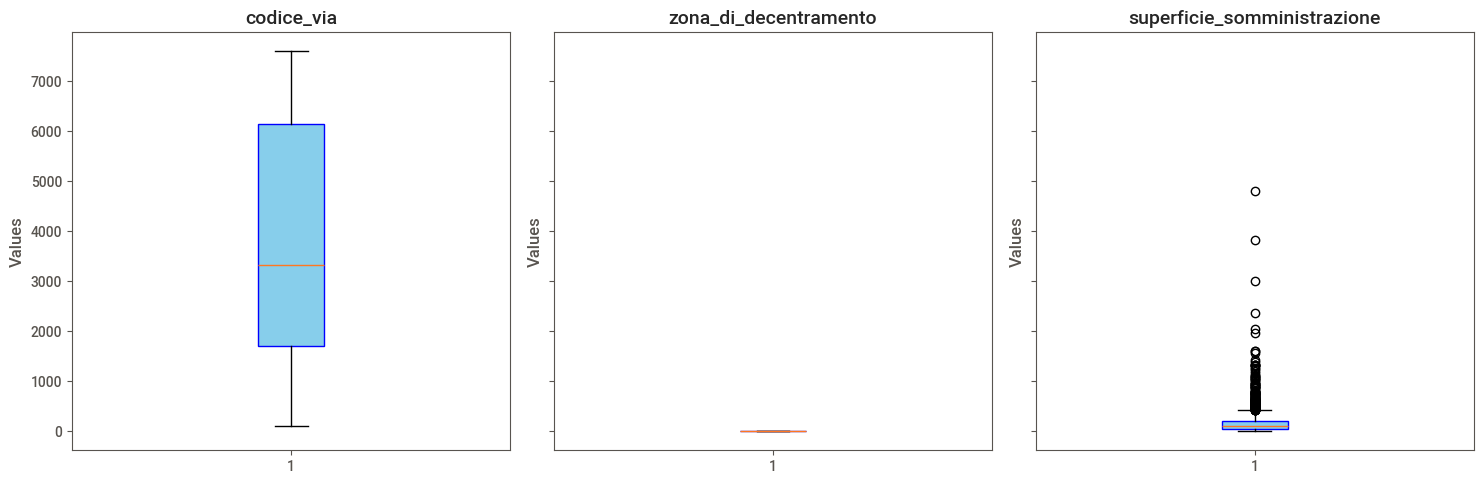

In [ ]:
fig, axes = plt.subplots(1, (len(numeric_cols) -1), figsize=((len(numeric_cols) - 1)* 5, 5), sharey=True)

for ax, col in zip(axes, numeric_cols):
    if col == 'mapping_insegna':
      break;
    ax.boxplot(data_imputed[col], patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
    ax.set_title(col, fontsize=14, weight='bold')
    ax.set_ylabel('Values', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

We can procede by removing these found outliers

In [ ]:
def remove_outliers(df, outliers_dict):
    df_cleaned = df.copy()
    for col, outlier_values in outliers_dict.items():
      if outlier_values:
        df_cleaned = df_cleaned[~df_cleaned[col].isin(outlier_values)]
    return df_cleaned

print(data_imputed.shape[0])
data_imputed = remove_outliers(data_imputed, outliers)
print(data_imputed.shape[0])

1916
1886


**t-SNE and DBSCAN**

In [ ]:
data = data_imputed.copy()

# Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_cols])

# Categorical attributes encoding
encoder = OneHotEncoder(sparse_output=False)
categorical_features = ['settore_storico', 'indirizzo', 'civico', 'forma_vendita']
data_encoded = encoder.fit_transform(data[categorical_features])

data_preprocessed = np.hstack((data_scaled, data_encoded))

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_preprocessed)

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=2)
labels = dbscan.fit_predict(tsne_results)

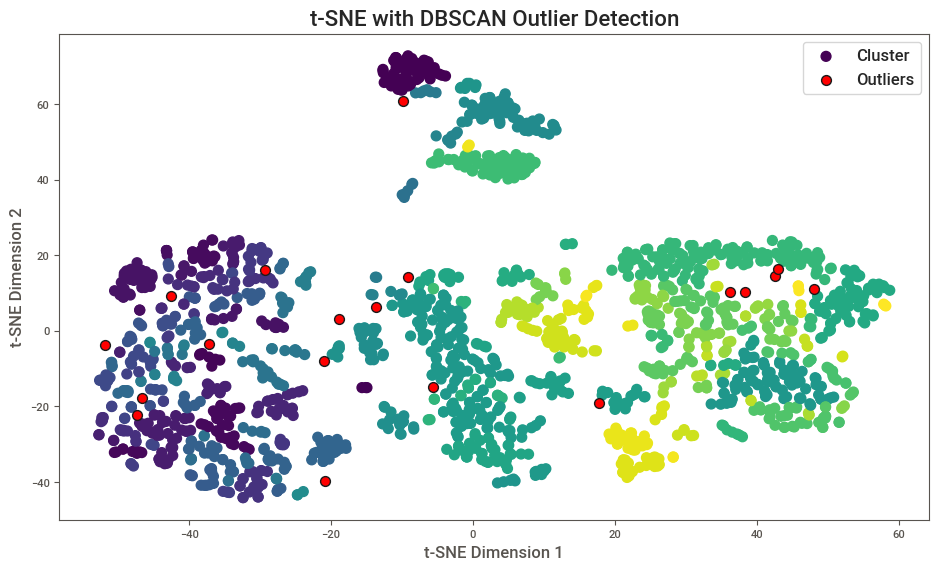

In [ ]:
is_outlier = (labels == -1)
not_outlier = ~is_outlier

plt.figure(figsize=(10, 6))
plt.scatter(
    tsne_results[not_outlier, 0],
    tsne_results[not_outlier, 1],
    c=labels[not_outlier],
    cmap='viridis',
    s=50,
    label='Cluster'
)

plt.scatter(
    tsne_results[is_outlier, 0],
    tsne_results[is_outlier, 1],
    c='red',
    s=50,
    label='Outliers',
    edgecolor='k'
)

plt.title('t-SNE with DBSCAN Outlier Detection', fontsize=16, weight='bold')
plt.xlabel('t-SNE Dimension 1', fontsize=12)
plt.ylabel('t-SNE Dimension 2', fontsize=12)
plt.legend(fontsize=12)
plt.show()

We can remove these outliers too

In [ ]:
non_outliers = labels != -1
data_cleaned = data[non_outliers].reset_index(drop=True)
print("Numero di punti originali:", len(data))
print("Numero di punti dopo la rimozione degli outlier:", len(data_cleaned))

Numero di punti originali: 1886
Numero di punti dopo la rimozione degli outlier: 1867


# 5. Data Duplication

Let us find the exact duplicate in the dataset and remove them

In [ ]:
data_cleaned.duplicated().sum()

0

In [ ]:
data_cleaned = data_cleaned.drop_duplicates().reset_index(drop=True)
data_cleaned.duplicated().sum()

0

In [ ]:
data_cleaned.head(10)

,settore_storico,indirizzo,civico,codice_via,zona_di_decentramento,forma_vendita,superficie_somministrazione,mapping_insegna
0,BAR,PIAZZA OSPEDALE MAGGIORE,3,1523,9,al banco,31,0
1,BAR,VIALE ALEMAGNA EMILIO,6,7106,1,al banco,290,1
2,BAR,VIA SERIO,15,4130,5,al banco,110,2
3,BAR,CORSO BUENOS AIRES,36,2129,3,al banco,34,3
4,BAR,CORSO MATTEOTTI GIACOMO,7,218,1,al banco,222,4
5,BAR,LARGO DOMODOSSOLA,1,6140,8,al banco,68,5
6,BAR,LARGO DOMODOSSOLA,1,6140,8,al banco,68,6
7,BAR,VIALE LIGURIA,21,5264,6,al banco,9,7
8,BAR,PIAZZALE LOTTO LORENZO,15,6539,8,al banco,26,8
9,BAR,PIAZZALE LOTTO LORENZO,15,6539,8,al banco,26,9


**RECORD LINKAGE**

Identify potential duplicates on "indirizzo" using Sorted Neighborhoo method.

In [ ]:
indexer = recordlinkage.index.SortedNeighbourhood(on='indirizzo', window=11)

candidate_links = indexer.index(data_cleaned)
candidate_links

MultiIndex([( 146,  106),
            ( 148,    2),
            ( 173,   73),
            ( 187,    5),
            ( 187,    6),
            ( 188,    5),
            ( 188,    6),
            ( 190,    8),
            ( 190,    9),
            ( 190,   10),
            ...
            (1860,   12),
            (1861,  642),
            (1861,  676),
            (1862,  467),
            (1862,  639),
            (1862, 1587),
            (1863,  919),
            (1864,  622),
            (1865, 1230),
            (1866,  520)],
           length=21316)

For the  identified pairs of suspicious record compare feature employing both exact matches and the Jaro-Winkler string similarity method for textual attributes. Pairs with at least six significant matches were considered duplicates, and the dataset was then updated by removing the identified duplicate records, keeping only one instance of each record.

In [ ]:
compare_cl = recordlinkage.Compare()

compare_cl.exact('settore_storico', 'settore_storico', label='settore_storico')
compare_cl.exact('codice_via', 'codice_via', label='codice_via')
compare_cl.exact('zona_di_decentramento', 'zona_di_decentramento', label='zona_di_decentramento')
compare_cl.exact('superficie_somministrazione', 'superficie_somministrazione', label='superficie_somministrazione')

compare_cl.string('indirizzo', 'indirizzo', method='jarowinkler', threshold=0.90, label='indirizzo')
compare_cl.string('civico', 'civico', method='jarowinkler', threshold=0.90, label='civico')
compare_cl.string('forma_vendita', 'forma_vendita', method='jarowinkler', threshold=0.90, label='forma_vendita')

features = compare_cl.compute(candidate_links, data_cleaned)
matches = features[features.sum(axis=1) > 5]

matches

settore_storico  codice_via  zona_di_decentramento  \
6    5            1              1                1             
9    8            1              1                1             
10   8            1              1                1             
     9            1              1                1             
11   8            1              1                1             
...                    ...         ...                    ...   
1848 929          1              1                1             
     930          1              1                1             
1852 1528         1              1                1             
1853 915          1              1                1             
1858 1828         1              1                1             

           superficie_somministrazione  indirizzo  civico  forma_vendita  
6    5                  1                  1.0       1.0        1.0       
9    8                  1                  1.0       1.0        1.0       
10   8                  1                  1.0       1.0        1.0       
     9                  1                  1.0       1.0        1.0       
11   8                  1                  1.0       1.0        1.0       
...                                ...        ...     ...            ...  
1848 929                1                  1.0       1.0        1.0       
     930                1                  1.0       0.0        1.0       
1852 1528               0                  1.0       1.0        1.0       
1853 915                1                  1.0       1.0        0.0       
1858 1828               0                  1.0       1.0        1.0       

[732 rows x 7 columns]

In [ ]:
print(f"Number of indexes: {len(matches.index)}")
for i in matches.index:
   print(data_cleaned.iloc[[i[0],i[1]]])

Output streaming troncato alle ultime 5000 righe.
   settore_storico      indirizzo       civico  codice_via  \
64        BAR       VIA DEI PICCOLOMINI    5       6513      
44        BAR       VIA DEI PICCOLOMINI    5       6513      

    zona_di_decentramento forma_vendita  superficie_somministrazione  \
64            7              al banco                124               
44            7              al banco                 15               

    mapping_insegna  
64        68         
44        48         
   settore_storico      indirizzo       civico  codice_via  \
64        BAR       VIA DEI PICCOLOMINI    5       6513      
45        BAR       VIA DEI PICCOLOMINI    5       6513      

    zona_di_decentramento forma_vendita  superficie_somministrazione  \
64            7              al banco                124               
45            7              al banco                 15               

    mapping_insegna  
64        68         
45        49         
   settore

In [ ]:
DATA = data_cleaned.copy()
indexes = []
for i in matches.index:
   if i[1] not in indexes:
       DATA = DATA.drop([i[1]])
   indexes.append(i[1])

In [ ]:
DATA

,settore_storico,indirizzo,civico,codice_via,zona_di_decentramento,forma_vendita,superficie_somministrazione,mapping_insegna
4,BAR,CORSO MATTEOTTI GIACOMO,7,218,1,al banco,222,4
6,BAR,LARGO DOMODOSSOLA,1,6140,8,al banco,68,6
12,BAR,PIAZZALE LOTTO LORENZO,15,6539,8,al banco,625,12
13,BAR,PIAZZA CADUTI DEL LAVORO,5,5249,5,al banco,15,13
15,BAR,PIAZZA ESQUILINO,9,6533,7,al banco,263,17
...,...,...,...,...,...,...,...,...
1862,RISTORANTE,VIA CORELLI ARCANGELO,61,3243,3,misto,394,2064
1863,RISTORANTE,VIA VERITA' DON GIOVANNI,25,1469,9,misto,170,2065
1864,DRINKS,VIA DELLE FORZE ARMATE,34,6643,7,al banco,54,2066
1865,DRINKS,VIA GALLARATE,40,7420,8,al banco,57,2067


In [ ]:
DATA.shape

(1617, 8)

In [ ]:
DQD_GLOBAL_ASSESSMENT_final = pd.DataFrame(columns=["SPATIAL_EXTENT", "UNIQUENESS (%)", "DISTINCTNESS (%)", "DUPLICATION (%)", "COMPLETENESS(%)"])

In [ ]:
SPATIAL_EXTENT = DATA.nunique().sum()

DISTINCT = (DATA.nunique().sum())
COUNT = DATA.count().sum()
ROWS = DATA.shape[0]*DATA.shape[1]
UNIQUENESS = DISTINCT / ROWS

DUPLICATION = DATA.duplicated()
DUPLICATION = (DUPLICATION.sum() / DATA.shape[0]) * 100

DISTINCTNESS = (DISTINCT / COUNT) * 100

NOT_NULL = DATA.count().sum()
NULL = DATA.isnull().sum().sum()
TOT = DATA.shape[0]*data.shape[1]
COMPLETENESS = (NOT_NULL / TOT) * 100

DQD_GLOBAL_ASSESSMENT.loc[len(DQD_GLOBAL_ASSESSMENT)] = [SPATIAL_EXTENT, UNIQUENESS * 100, DISTINCTNESS, DUPLICATION, COMPLETENESS]
DQD_GLOBAL_ASSESSMENT

,SPATIAL_EXTENT,UNIQUENESS (%),DUPLICATION (%),DISTINCTNESS (%),COMPLETENESS(%)
0,5709.0,22.983092,1.062802,29.184133,78.752013
1,4107.0,31.748609,31.748609,0.000000,100.000000


Now we can save our cleaned dataset

In [ ]:
DATA.to_csv('DATA.csv', index=False)